In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array

import math

# sys.path.append('/home/cms/Desktop/LLP/cms_lpc_llp/jet_timing_studies/python/lib')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/jet_timing_studies/python/lib')
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/llp_analyzer/python/lib')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/00
3.6.8 (default, Apr 25 2019, 21:02:35) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [2]:
directory = '/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/ttbar/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190814/'
# directory = '/nfshome/jmao/cms-llp/plots/20190814/'

# fname = {'analyzer-dyll-4FEVT-jet-SC-dt-fix.root'}
# fname = {'analyzer-dyll-4FEVT-dt-fix-sm-e1.root'}
fname = {'analyzer-dyll-4FEVT-jet-time-rescale.root'}
# fname = {'analyzer-dyll-4FEVT-jet-time.root'}
# fname = {'analyzer-dyll-4FEVT-eb-tp.root'}
# fname = {'analyzer-dyll-4FEVT-jet-same-prod-vtx.root'}
# fname = {'analyzer-dyll-4FEVT-dt-fix-sm-e10.root'}
# fname = {'analyzer-dyll-4FEVT-dt-fix-sm.root'}
# fname = {'analyzer-dyll-4FEVT-SC-dt-fix.root'}
# fname = {'analyzer-dyll-4FEVT-SC-dt.root'}
# fname = {'analyzer-dyll-4FEVT-SC.root'}
# fname = {'analyzer-dyll-4FEVT-ak4jetnonu.root'}
# fname = {'analyzer-dyll-4FEVT-jet.root'}
# fname = {'analyzer-dyll-4FEVT-pi0cluster1000.root'}

tree = OrderedDict()

 

for file in fname:
#     print(directory+file)
    root_dir = uproot.open(directory+file) 
    print (directory+file)
    print ('Open ready')

    tree[file] = root_dir['L1EcalTimingAnalyzer/ecalTPTree']
    print ('Tree ready')    
#     print (tree[file],file)

/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/ttbar/analyzer-dyll-4FEVT-jet-time-rescale.root
Open ready
Tree ready


# DR 2d

In [163]:
directory = '/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/ttbar/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190814/'

# fname = {'analyzer-dyll-4FEVT-SC.root'}
fname = {'analyzer-dyll-4FEVT-ak4jetnonu.root'}
# fname = {'analyzer-dyll-4FEVT-jet.root'}
# fname = {'analyzer-dyll-4FEVT-pi0cluster1000.root'}

tree = OrderedDict()

 

for file in fname:
#     print(directory+file)
    root_dir = uproot.open(directory+file) 
    print ('Open ready')

    tree[file] = root_dir['L1EcalTimingAnalyzer/ecalTPTree']
    print ('Tree ready')    
#     print (tree[file],file)

Open ready
Tree ready


i,j,n,s,m,a
analyzer-dyll-4FEVT-ak4jetnonu.root <TTree b'ecalTPTree' at 0x7faea9877320>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_dr.png has been created


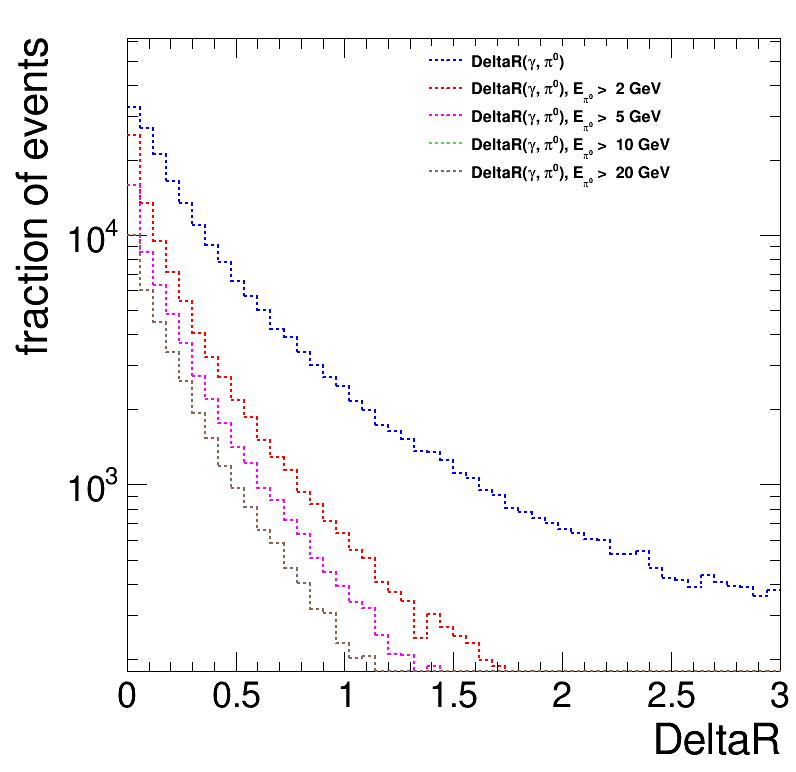

In [177]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_pz = v['gParticleSiblingDR'].array()
    pho_mo_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_basic_str = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_e2_str = np.logical_and(pho_basic_str, pho_e> 2)
    pho_e5_str = np.logical_and(pho_basic_str, pho_e> 5)
    pho_e10_str = np.logical_and(pho_basic_str, pho_e> 10)
    pho_e20_str = np.logical_and(pho_basic_str, pho_e> 20)
    
    pho_pz = pho_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    pho_mo_pz0 = pho_mo_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    
    pho_mo_pz2 = pho_mo_pz[pho_e2_str]
    pho_mo_pz5 = pho_mo_pz[pho_e5_str]
    pho_mo_pz10 = pho_mo_pz[pho_e10_str]
    pho_mo_pz20 = pho_mo_pz[pho_e20_str]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz0.flatten()
    mo_pz2 = pho_mo_pz2.flatten()
    mo_pz5 = pho_mo_pz5.flatten()
    mo_pz10 = pho_mo_pz10.flatten()
    mo_pz20 = pho_mo_pz20.flatten()
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])

    ht12 = create_TH1D( mo_pz2, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht12.SetLineStyle(2)
    ht12.SetLineColor(std_color_list[i+1])
    ht12.SetMarkerColor(std_color_list[i+1])
    
    ht15 = create_TH1D( mo_pz5, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht15.SetLineStyle(2)
    ht15.SetLineColor(std_color_list[i+4])
    ht15.SetMarkerColor(std_color_list[i+4])
    
    
    ht110 = create_TH1D( mo_pz10, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht110.SetLineStyle(2)
    ht110.SetLineColor(std_color_list[i+3])
    ht110.SetMarkerColor(std_color_list[i+3])
    
    ht120 = create_TH1D( mo_pz10, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht120.SetLineStyle(2)
    ht120.SetLineColor(std_color_list[i+5])
    ht120.SetMarkerColor(std_color_list[i+5])
  
    
    ht1.Draw('same')
    ht12.Draw('same')
    ht15.Draw('same')
    ht110.Draw('same')
    ht120.Draw('same')

 
    leg.AddEntry(ht1, 'DeltaR(#gamma, #pi^{0})')
    leg.AddEntry(ht12, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  2 GeV')
    leg.AddEntry(ht15, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  5 GeV')
    leg.AddEntry(ht110, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  10 GeV')
    leg.AddEntry(ht120, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  20 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_dr.png')

i,j,n,s,m,a
analyzer-dyll-4FEVT-ak4jetnonu.root <TTree b'ecalTPTree' at 0x7faea99d9438>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-ak4jetnonu.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_mo_bro_dr_2d.png has been created


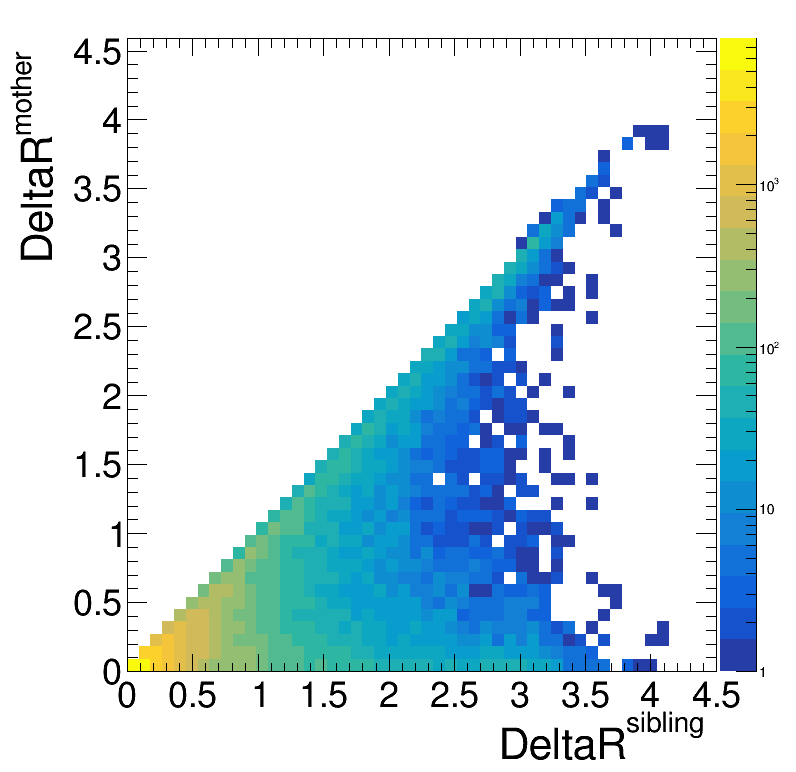

In [10]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleId'].array()
    pho_eta = v['gParticleEta'].array()
    
    bro_eta = v['gParticleSiblingEta'].array()
    pho_pz = v['gParticleSiblingDR'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_eta = v['gParticleMotherEta'].array()
    
    eta1_string = np.logical_and(abs(pho_eta)<1.5, abs(bro_eta)<1.5)
    eta_string = np.logical_and(eta1_string, abs(pho_mo_eta)<1.5)

    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    id_string = np.logical_and(pho_string, pho_bro_string)
    cut_string = np.logical_and(id_string, eta_string)
    
    pho_pz1 = pho_pz[cut_string]
    pho_bro_pz1 = pho_bro_pz[cut_string]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
   
    hz = rt.TH2D(k,k,50,0,4.5,50,-0,4.5)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetYaxis().SetTitle('DeltaR^{mother} ')
    hz.GetXaxis().SetTitle('DeltaR^{sibling} ')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_bro_dr_2d.png')


# Photon Energy 

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faeca9de8d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_e.png has been created


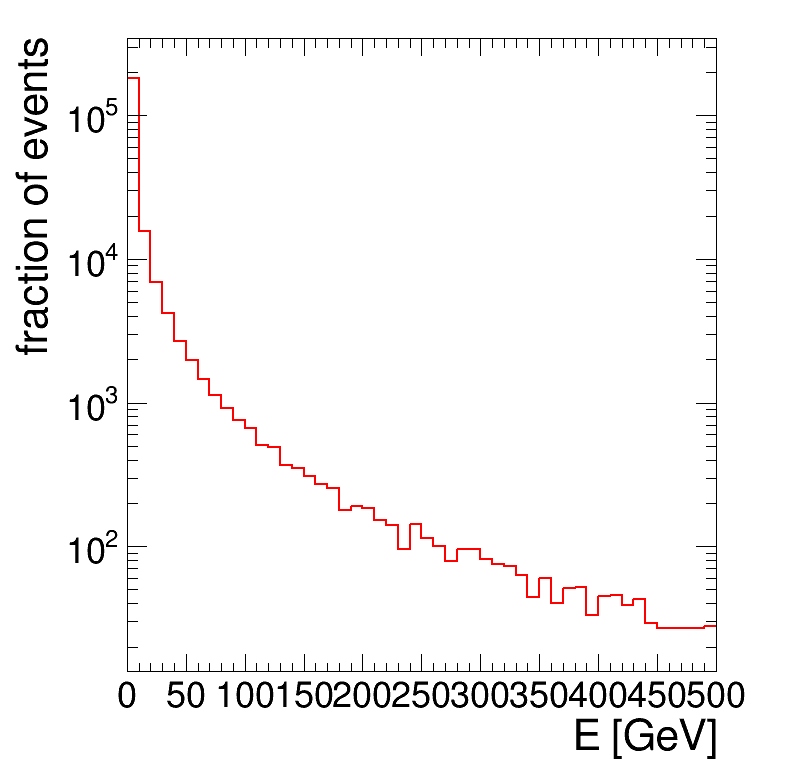

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e.png')


# Pi0 Energy

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e.png has been created


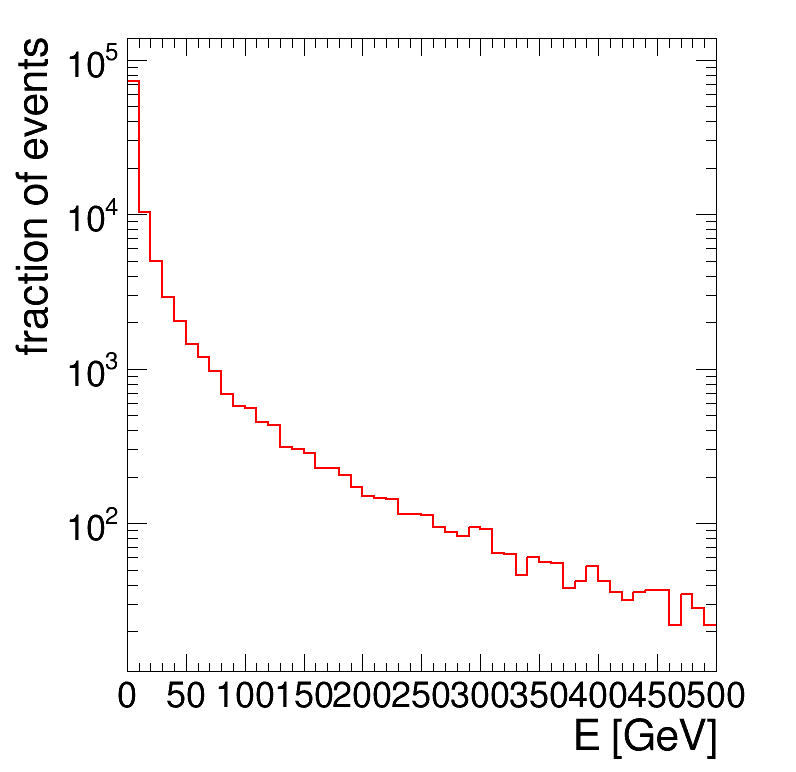

In [19]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e.png')


# Photon Cluster

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faeca9de8d0>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-SC.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_e_e3x3__dr01_2d_01_f.png has been created


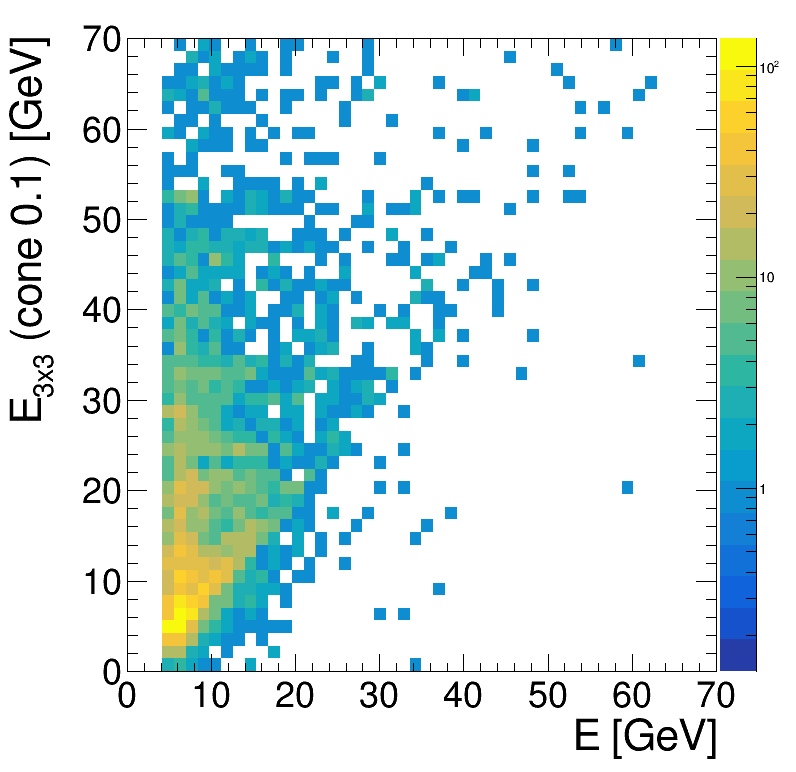

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gE3x3_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==22, pho_id==22)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_id==22)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)
    pho_pair_basic_string = np.logical_and(pho_id==22, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_e3x3__dr01_2d_01_f.png')


# Pi0 Cluster

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-SC.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e_e3x3__dr01_2d_01_f.png has been created


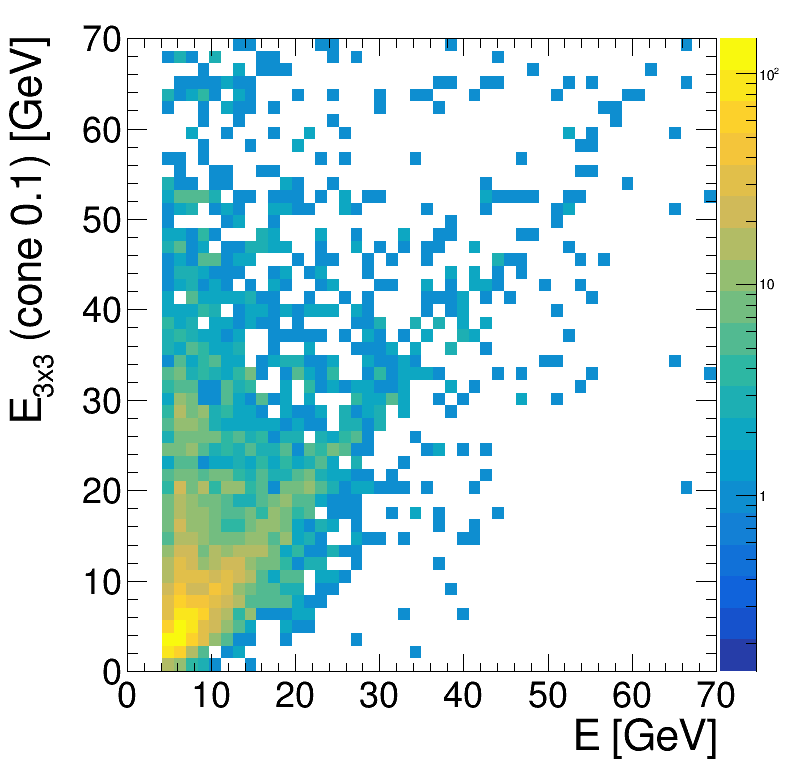

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gE3x3_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==111, pho_id==111)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==111, pho_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)

    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_e3x3__dr01_2d_01_f.png')

#  photon super cluster

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-SC.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_e_sc_2d_01_f.png has been created


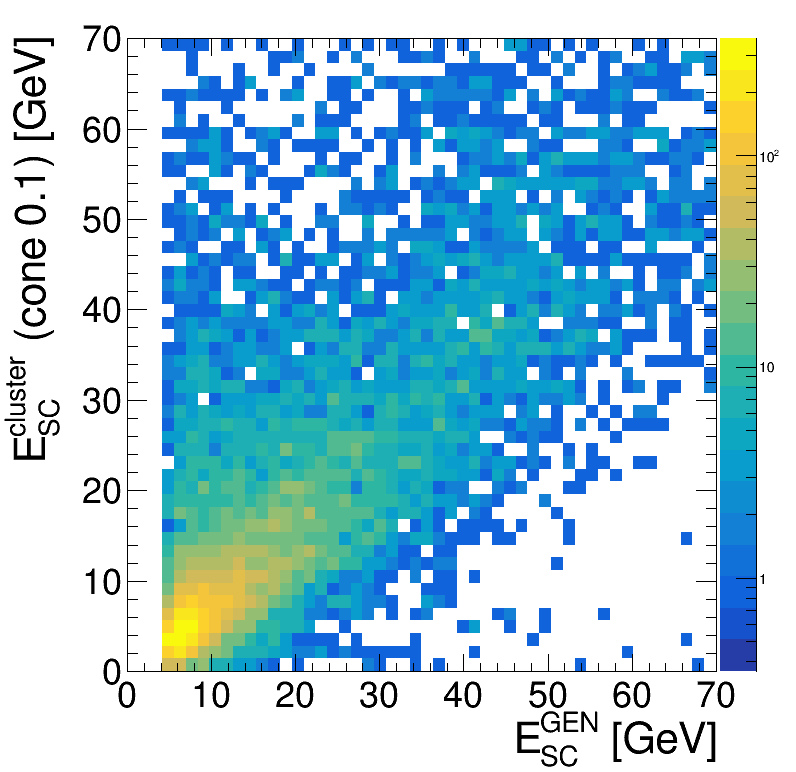

In [17]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['genEsc_01'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gEsc_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==22, pho_id==22)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_id==22)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)
    pho_pair_basic_string = np.logical_and(pho_id==22, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E_{SC}^{GEN} [GeV]')
    hz.GetYaxis().SetTitle('E_{SC}^{cluster} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_sc_2d_01_f.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-dt-fix-sm-e10.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_e_sc_2d_01_f2.png has been created


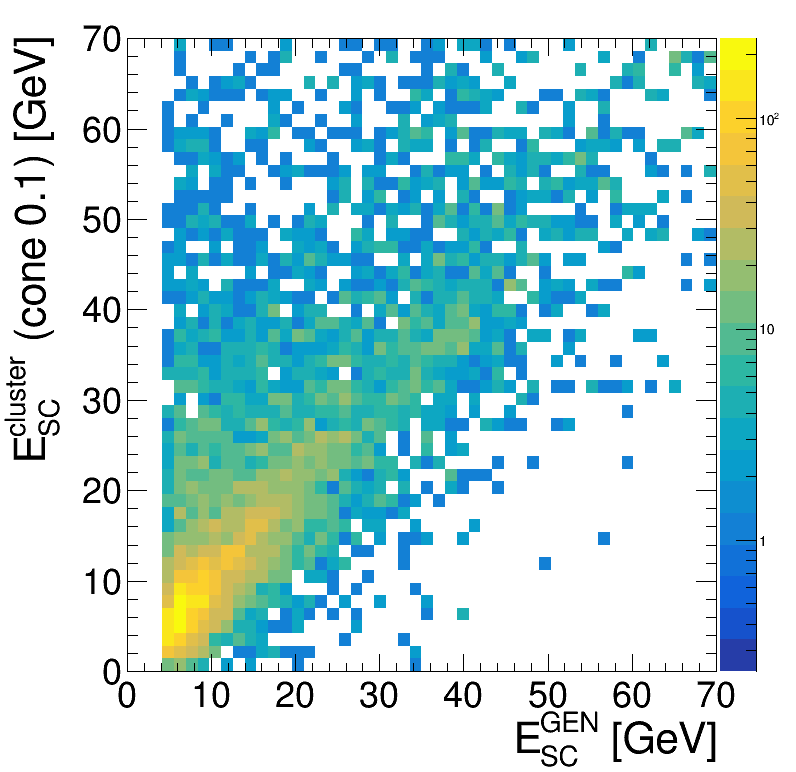

In [14]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['genEsc_01'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gEsc_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==22, pho_id==22)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_id==22)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)
    pho_pair_basic_string = np.logical_and(pho_id==22, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E_{SC}^{GEN} [GeV]')
    hz.GetYaxis().SetTitle('E_{SC}^{cluster} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_sc_2d_01_f2.png')


#  Pi0 super cluster

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-SC.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e_sc_2d_01_f.png has been created


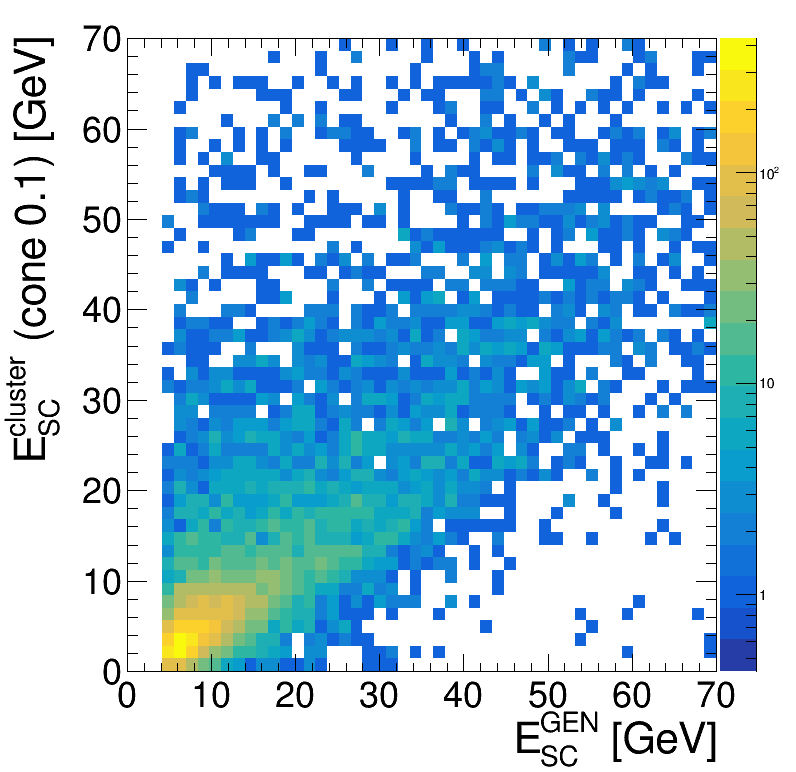

In [16]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['genEsc_01'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gEsc_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==111, pho_id==111)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==111, pho_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)

    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E_{SC}^{GEN} [GeV]')
    hz.GetYaxis().SetTitle('E_{SC}^{cluster} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_sc_2d_01_f.png')

i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e_sc_2d_01_f2.png has been created


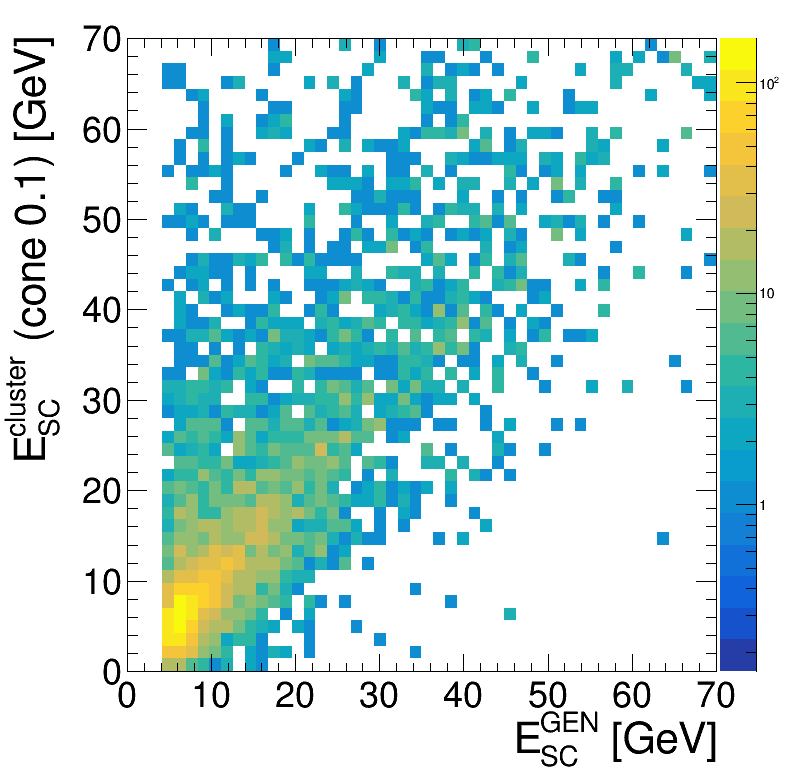

In [13]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['genEsc_01'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_emax2 = v['gEmax_02'].array()
    pho_eta = v['gParticleEta'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    si_eta = v['gParticleSiblingEta'].array()
    mo_eta = v['gParticleMotherEta'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
#     pho_bro_pz = v['gE9x9_01'].array()
#     pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_pz = v['gEsc_01'].array()
#     pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleMotherId'].array()
#     pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_eta_string = np.logical_and(abs(pho_eta)<1.5,  1)
#     pho_eta_string = np.logical_and(pho_eta1_string, abs(mo_eta)<1.5)
#     pho_eta3_string = np.logical_and(abs(pho_eta)>0.4, abs(pho_eta)<0.5)
#     pho_eta_string = np.logical_and(pho_eta2_string, pho_eta3_string )
    
    pho_emax1_string = np.logical_and(pho_emax1>5, pho_emax2>0)
    pho_emax2_string = np.logical_and(pho_emax1_string, pho_emax2>=pho_emax1)
    pho_emax_string = np.logical_and(pho_emax2_string, pho_emax1/pho_bro_pz>0.1)
    
    pho_string = np.logical_and(pho_id==111, pho_id==111)
    pho_mo1_string = np.logical_and(abs(pho_gm_id)>=1,abs(pho_gm_id)<=6)
    pho_mo_string = np.logical_or(pho_mo1_string,abs(pho_gm_id)==21)
    bro_dr1_string = np.logical_and(mo_dr>0.0, si_dr>0.0)
    bro_dr2_string = np.logical_and(mo_dr<10, si_dr<10)
    bro_dr_string = np.logical_and(bro_dr1_string, bro_dr2_string)
    
    pho_bro_string = np.logical_and(pho_bro_id==111, pho_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    pho_pair_dr1_string = np.logical_and(pho_pair_dr_string, pho_bro_pz>0)
    pho_pair_dr2_string = np.logical_and(pho_pair_dr1_string, pho_eta_string)
    pho_pair_dr3_string = np.logical_and(pho_pair_dr2_string, pho_pz>5)
    pho_pair_dr4_string = np.logical_and(pho_pair_dr3_string, pho_mo_string)
#     pho_pair_f_string = np.logical_and(pho_pair_dr4_string, pho_eta_string)

    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
    pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_pz>5)
    
    pho_pz1 = pho_pz[pho_pair_f_string]
    pho_bro_pz1 = pho_bro_pz[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_bro_eta1 = si_eta[pho_pair_f_string]
    pho_dr1 = si_dr[pho_pair_f_string]
    pho_bro_dr1 = mo_dr[pho_pair_f_string]
    pho_em1 = pho_emax1[pho_pair_f_string]
    pho_bro_em1 = pho_emax2[pho_pair_f_string]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
#     print(pz,bro_pz)
    
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
    dr = pho_dr1.flatten()
    bro_dr = pho_bro_dr1.flatten()
#     print(dr,bro_dr)
    
    em1 = pho_em1.flatten()
    em2 = pho_bro_em1.flatten()
#     print(em1,em2)
    
#     pz = pho_pz1[:,0]
#     bro_pz = pho_bro_pz1[:,0]
  
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('E_{SC}^{GEN} [GeV]')
    hz.GetYaxis().SetTitle('E_{SC}^{cluster} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_sc_2d_01_f2.png')

# pi0 vtx 

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_vtx.png has been created


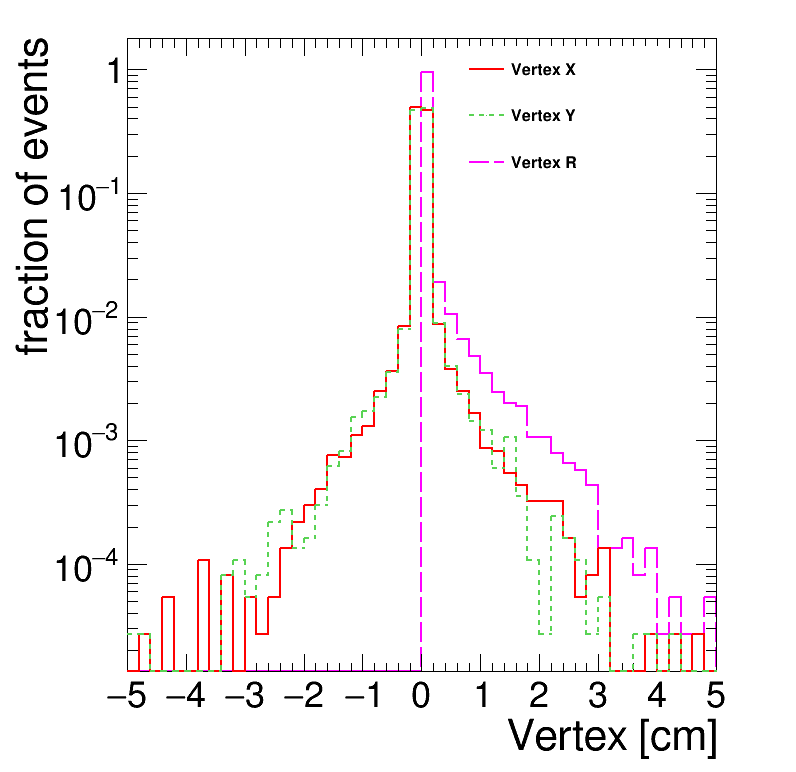

In [100]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_vx = v['gParticle_decay_vtx_x'].array()
    pho_vy = v['gParticle_decay_vtx_y'].array()
    pho_vz = v['gParticle_decay_vtx_z'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     pho_tof = pho_tof[pho_id==111]
    pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vx = pho_vx[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vy = pho_vy[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    pho_vz = pho_vz[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    vx = pho_vx.flatten()
    vy = pho_vy.flatten()
    vz = pho_vz.flatten()
    
    vr = [math.sqrt(x*x+y*y) for i, (x,y) in enumerate(zip(vx,vy))]
    
#     ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
#     ht0.SetLineColor(std_color_list[i+1])
#     ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
#     ht0.DrawNormalized('')

    htr = create_TH1D( vr, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htr.SetLineStyle(9)
    htr.SetLineColor(std_color_list[i+4])
    htr.SetMarkerColor(std_color_list[i+4])
    
#     htx.Draw('')
    htr.DrawNormalized('same')
 

    htx = create_TH1D( vx, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htx.SetLineColor(std_color_list[i+1])
    htx.SetMarkerColor(std_color_list[i+1])
    
#     htx.Draw('')
    htx.DrawNormalized('same')
    
    
    hty = create_TH1D( vy, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    hty.SetLineStyle(7)
    hty.SetLineColor(std_color_list[i+3])
    hty.SetMarkerColor(std_color_list[i+3])
    
#     htx.Draw('')
    hty.DrawNormalized('same')
    


    htz = create_TH1D( vz, axis_title=['Vertex [cm]', 'fraction of events'], name="", binning=[50,-5,5])
    htz.SetLineColor(std_color_list[i+2])
    htz.SetMarkerColor(std_color_list[i+2])
    
#     htz.Draw('')
#     htz.DrawNormalized('same')

    
    leg.AddEntry(htx,'Vertex X')
    leg.AddEntry(hty,'Vertex Y')
    leg.AddEntry(htr,'Vertex R')
#     leg.AddEntry(htz,'Vertex Z')
    
    
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_vtx.png')


# Pi0 TOF

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof.png has been created


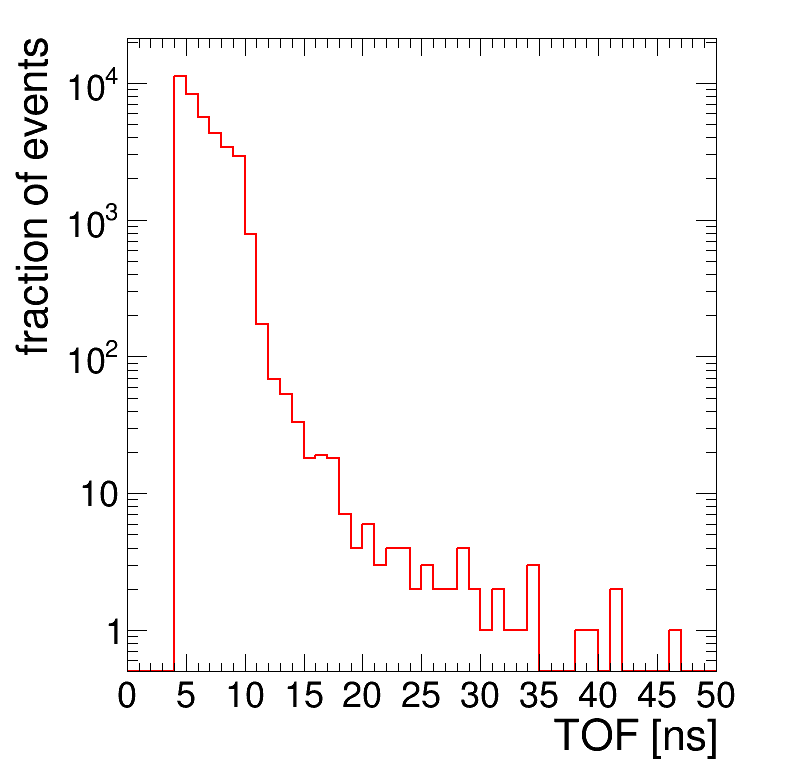

In [39]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_tof = pho_tof[pho_id==111]
#     pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e1.root <TTree b'ecalTPTree' at 0x7f8771625908>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pho_tof.png has been created


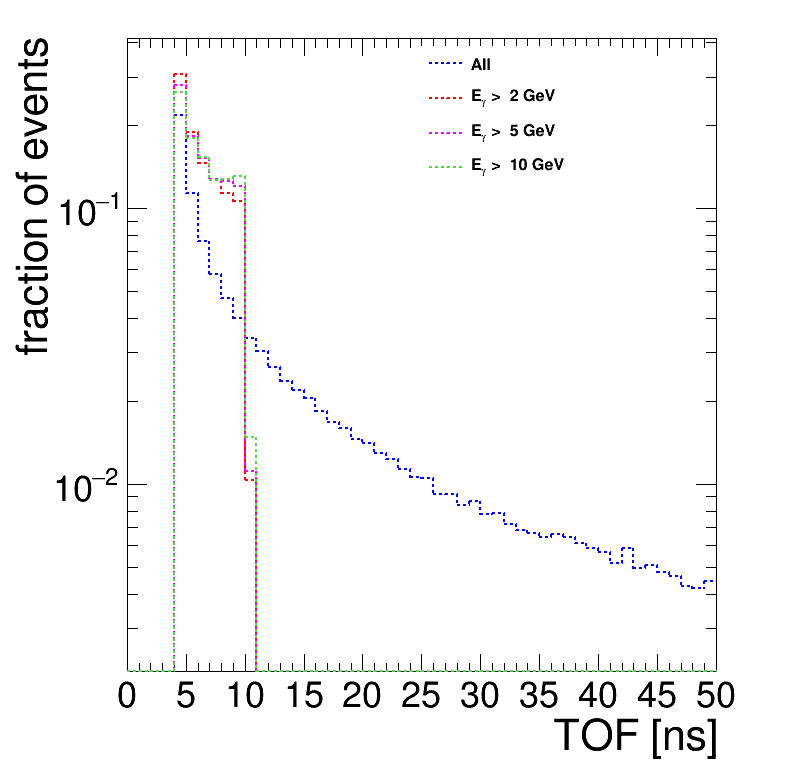

In [29]:
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.1)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_eta = v['gParticleEta'].array()
    pho_pz = v['g_tof'].array()
    pho_mo_pz = v['g_tof'].array()
#     pho_mo_pz = v['gParticleMotherDR'].array()
#     pho_id = v['gParticleSiblingId'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_basic1_str = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_basic_str = np.logical_and(pho_basic1_str, abs(pho_eta)<1.5)

    pho_e2_str = np.logical_and(pho_basic_str, pho_e> 2)
    pho_e5_str = np.logical_and(pho_basic_str, pho_e> 5)
    pho_e10_str = np.logical_and(pho_basic_str, pho_e> 10)
    pho_e20_str = np.logical_and(pho_basic_str, pho_e> 20)
    
    pho_pz = pho_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    pho_mo_pz0 = pho_mo_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    
    pho_mo_pz2 = pho_mo_pz[pho_e2_str]
    pho_mo_pz5 = pho_mo_pz[pho_e5_str]
    pho_mo_pz10 = pho_mo_pz[pho_e10_str]
    pho_mo_pz20 = pho_mo_pz[pho_e20_str]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz0.flatten()
    mo_pz2 = pho_mo_pz2.flatten()
    mo_pz5 = pho_mo_pz5.flatten()
    mo_pz10 = pho_mo_pz10.flatten()
    mo_pz20 = pho_mo_pz20.flatten()
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])

    ht12 = create_TH1D( mo_pz2, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht12.SetLineStyle(2)
    ht12.SetLineColor(std_color_list[i+1])
    ht12.SetMarkerColor(std_color_list[i+1])
    
    ht15 = create_TH1D( mo_pz5, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht15.SetLineStyle(2)
    ht15.SetLineColor(std_color_list[i+4])
    ht15.SetMarkerColor(std_color_list[i+4])
    
    
    ht110 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht110.SetLineStyle(2)
    ht110.SetLineColor(std_color_list[i+3])
    ht110.SetMarkerColor(std_color_list[i+3])
    
    ht120 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht120.SetLineStyle(2)
    ht120.SetLineColor(std_color_list[i+5])
    ht120.SetMarkerColor(std_color_list[i+5])
  
    
#     ht1.Draw('same')
#     ht12.Draw('same')
#     ht15.Draw('same')
#     ht110.Draw('same')
#     ht120.Draw('same')

    ht1.DrawNormalized('same')
    ht12.DrawNormalized('same')
    ht15.DrawNormalized('same')
    ht110.DrawNormalized('same')


 
    leg.AddEntry(ht1, 'All')
    leg.AddEntry(ht12, 'E_{#gamma} >  2 GeV')
    leg.AddEntry(ht15, 'E_{#gamma} >  5 GeV')
    leg.AddEntry(ht110, 'E_{#gamma} >  10 GeV')
#     leg.AddEntry(ht120, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  20 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_tof.png')

i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e1.root <TTree b'ecalTPTree' at 0x7f8771625908>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof.png has been created


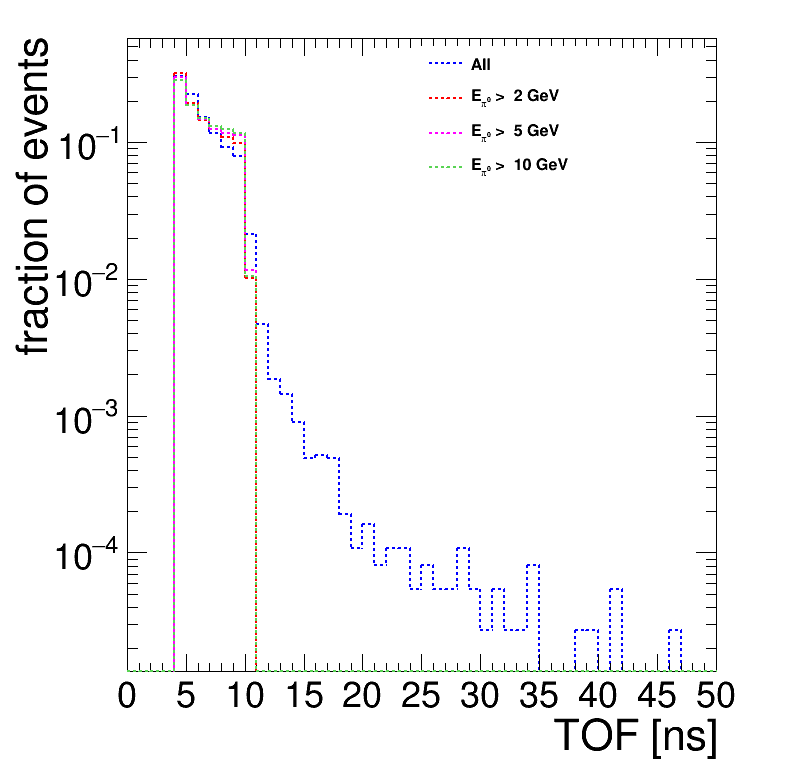

In [30]:
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.1)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_eta = v['gParticleEta'].array()
    pho_pz = v['g_tof'].array()
    pho_mo_pz = v['g_tof'].array()
#     pho_mo_pz = v['gParticleMotherDR'].array()
#     pho_id = v['gParticleSiblingId'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_basic_str = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_e2_str = np.logical_and(pho_basic_str, pho_e> 2)
    pho_e5_str = np.logical_and(pho_basic_str, pho_e> 5)
    pho_e10_str = np.logical_and(pho_basic_str, pho_e> 10)
    pho_e20_str = np.logical_and(pho_basic_str, pho_e> 20)
    
 
    pho_mo_pz0 = pho_mo_pz[pho_basic_str]
    
    pho_mo_pz2 = pho_mo_pz[pho_e2_str]
    pho_mo_pz5 = pho_mo_pz[pho_e5_str]
    pho_mo_pz10 = pho_mo_pz[pho_e10_str]
    pho_mo_pz20 = pho_mo_pz[pho_e20_str]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz0.flatten()
    mo_pz2 = pho_mo_pz2.flatten()
    mo_pz5 = pho_mo_pz5.flatten()
    mo_pz10 = pho_mo_pz10.flatten()
    mo_pz20 = pho_mo_pz20.flatten()
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])

    ht12 = create_TH1D( mo_pz2, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht12.SetLineStyle(2)
    ht12.SetLineColor(std_color_list[i+1])
    ht12.SetMarkerColor(std_color_list[i+1])
    
    ht15 = create_TH1D( mo_pz5, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht15.SetLineStyle(2)
    ht15.SetLineColor(std_color_list[i+4])
    ht15.SetMarkerColor(std_color_list[i+4])
    
    
    ht110 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht110.SetLineStyle(2)
    ht110.SetLineColor(std_color_list[i+3])
    ht110.SetMarkerColor(std_color_list[i+3])
    
    ht120 = create_TH1D( mo_pz10, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht120.SetLineStyle(2)
    ht120.SetLineColor(std_color_list[i+5])
    ht120.SetMarkerColor(std_color_list[i+5])
  
    
#     ht1.Draw('same')
#     ht12.Draw('same')
#     ht15.Draw('same')
#     ht110.Draw('same')
#     ht120.Draw('same')

    ht1.DrawNormalized('same')
    ht12.DrawNormalized('same')
    ht15.DrawNormalized('same')
    ht110.DrawNormalized('same')


 
    leg.AddEntry(ht1, 'All')
    leg.AddEntry(ht12, 'E_{#pi^{0}} >  2 GeV')
    leg.AddEntry(ht15, 'E_{#pi^{0}} >  5 GeV')
    leg.AddEntry(ht110, 'E_{#pi^{0}} >  10 GeV')
#     leg.AddEntry(ht120, 'DeltaR(#gamma, #pi^{0}), E_{#pi^{0}} >  20 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof.png')

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC.root <TTree b'ecalTPTree' at 0x7faea143c5c0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof_in_eb.png has been created


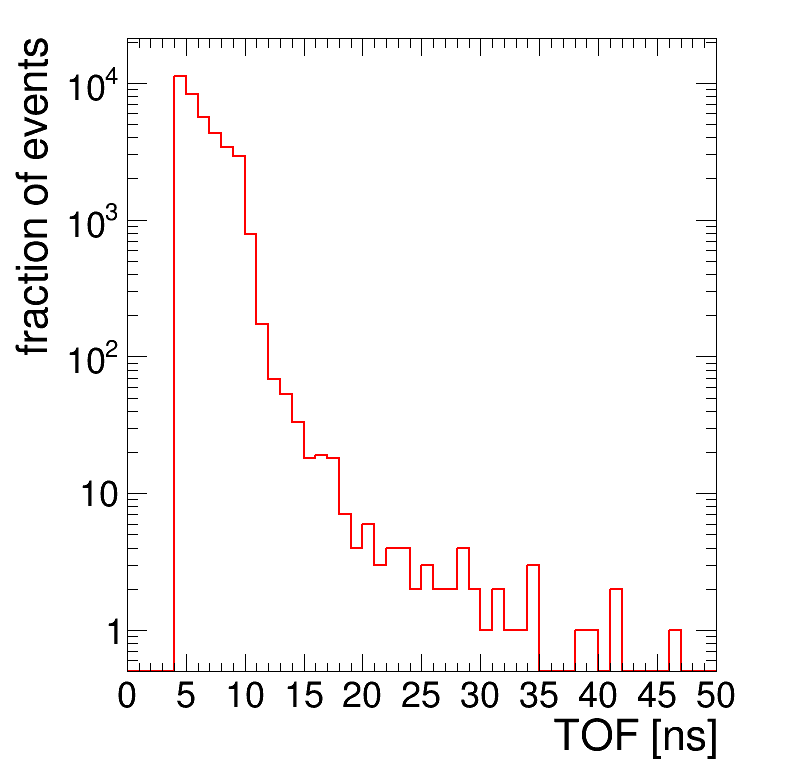

In [40]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     pho_tof = pho_tof[pho_id==111]
    pho_tof = pho_tof[np.logical_and(pho_id==111, abs(pho_eta)<1.5)]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,50])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof_in_eb.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-SC-dt.root <TTree b'ecalTPTree' at 0x7faea9841f28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof_in_eb_e5.png has been created


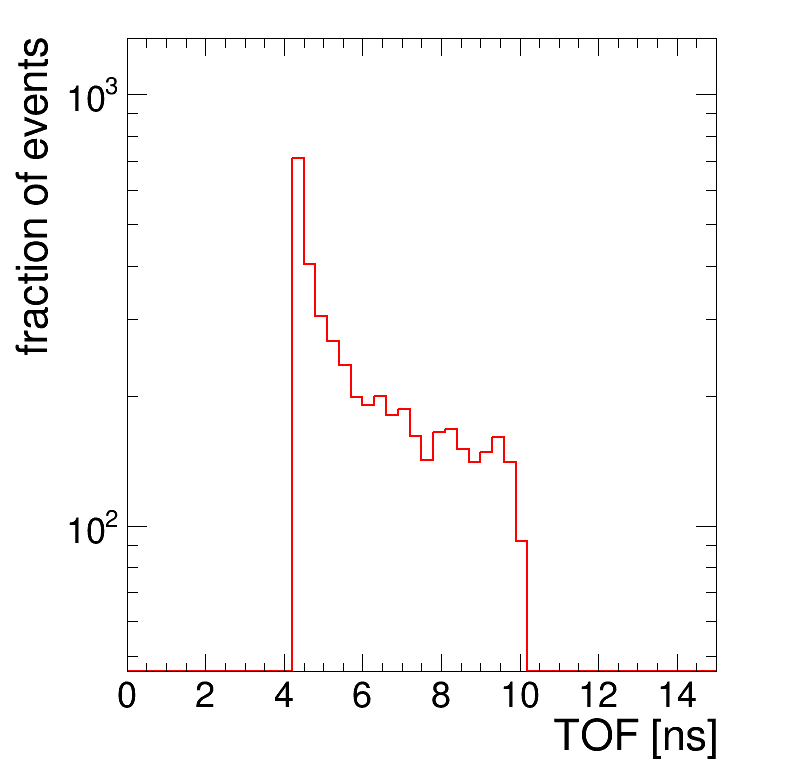

In [107]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[50,-0,15])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof_in_eb_e5.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-SC-dt.root <TTree b'ecalTPTree' at 0x7faea9841f28>
[8.630704  9.009439  8.973337  8.830045  8.696867  8.946264  8.867034
 8.488019  9.138564  9.034173  9.209239  8.562928  8.906147  8.766929
 8.843827  8.744293  8.7110405 8.841386  8.665295  8.685181  9.16435
 8.606282  8.624885  8.76902   8.774571  8.651934  8.825558  9.032206
 8.654828  8.505092  8.96007   9.051865  8.936034  8.826572  8.644768
 9.218552  8.959469  8.754213  8.766647  8.581862  8.5559635 8.7694
 8.582492  8.893007  8.831979  8.942176  8.5449915 8.935185  9.085949
 9.137033  8.822748  9.0132475 9.001597  9.20221  ] 999
54


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof_same_direction.png has been created


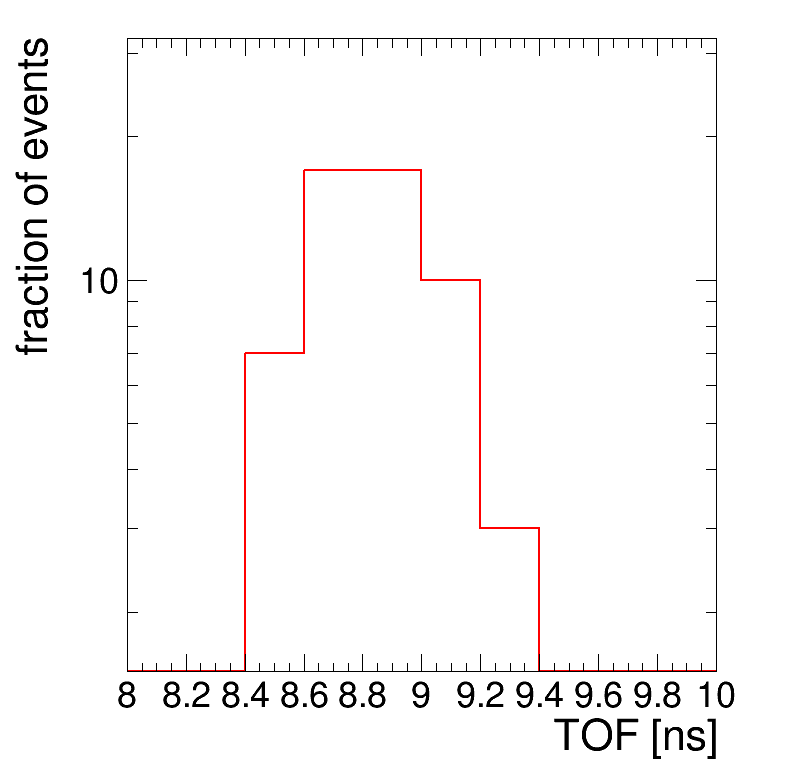

In [104]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_evt = v['eventNum'].array()
    pho_eta = v['gParticleEta'].array()
    pho_Phi = v['gParticlePhi'].array()
    pho_tof = v['g_tof'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)

    pho_eta_string = np.logical_and(pho_eta > -1.4, pho_eta< -1.3)
    pho_phi_string = np.logical_and(pho_eta > -1.6, pho_phi< -1.4)
    pho_etaphi = np.logical_and(pho_eta_string, pho_phi_string)

    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_etaphi)
    
    pho_tof = pho_tof[pho_pair_f_string]
#     pho_evt = pho_evt[pho_pair_f_string]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
#     evt = pho_evt.flatten()
    print(tof,evt)
    print(len(tof))
    
    ht0 = create_TH1D( tof, axis_title=['TOF [ns]', 'fraction of events'], name="", binning=[10,8,10])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'pi0_tof_in_eb_e5.png')
c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-SC-dt.root <TTree b'ecalTPTree' at 0x7faea9841f28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_tof_eta_phi_2d_f.png has been created


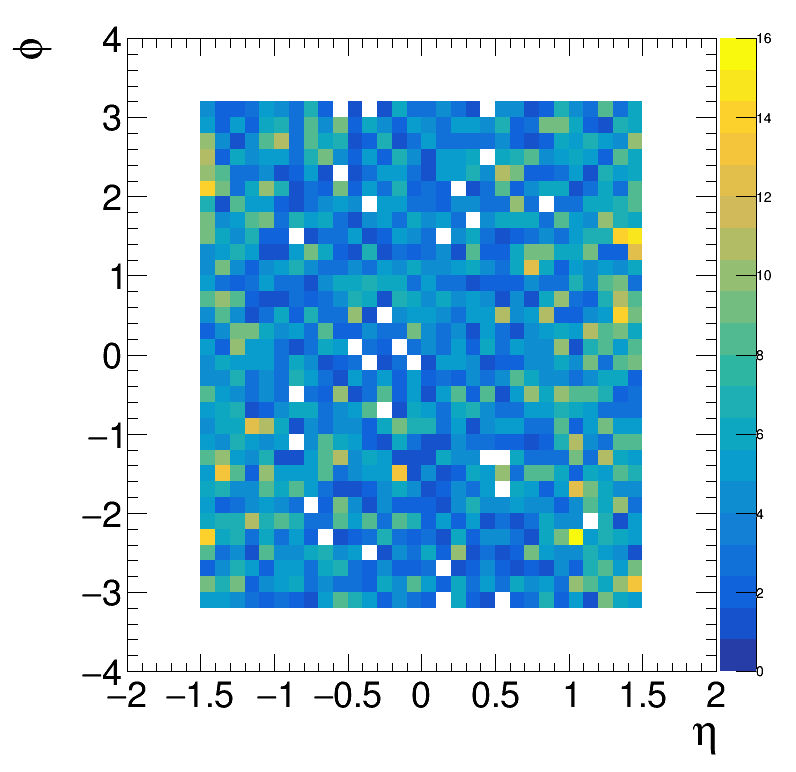

In [103]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    
    pho_eta = v['gParticleEta'].array()
    pho_Phi = v['gParticlePhi'].array()
    pho_tof = v['g_tof'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    
    pho_tof1 = pho_tof[pho_pair_f_string]
    pho_eta1 = pho_eta[pho_pair_f_string]
    pho_phi1 = pho_phi[pho_pair_f_string]
    
#     print(pho_tof1[2])
    
# #     pho_tof10 = [if x==-666:  0 : x  for i, x in enumerate(pho_tof1)]

#     for i, x in enumerate(pho_tof1):
#         for j, y in enumerate(x):
#             if y == -666: 
#                 print(i,j)
#                 x[j] = 0
    
#     print(pho_tof1[2])
    
    
    pho_eta1w = [x*y for i, (x, y) in enumerate(zip(pho_eta1,pho_tof1))]
    pho_phi1w = [x*y for i, (x, y) in enumerate(zip(pho_phi1,pho_tof1))]
    
 
    eta = pho_eta1.flatten()
    bro_eta = pho_bro_eta1.flatten()
#     print(eta,bro_eta)
    
 
                      
    hz = rt.TH2D(k,k,40,-2,2,40,-4,4)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetXaxis().SetTitle('#eta')
    hz.GetYaxis().SetTitle('#phi')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pho_eta1,pho_phi1)):
#     for evt,(pz1,pz2) in enumerate(zip(pho_eta1w,pho_phi1w)):
        for evt1,(pz11,pz21) in enumerate(zip(pz1,pz2)):
            hz.Fill(pz11,pz21)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
# c.SetLogz()
c.SetRightMargin(0.1)
# c.SetLeftMargin(10.0)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_tof_eta_phi_2d_f.png')

# pi0 super cluster dt

i,j,n,s,m,a
analyzer-dyll-4FEVT-SC-dt.root <TTree b'ecalTPTree' at 0x7faea9841f28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5.png has been created


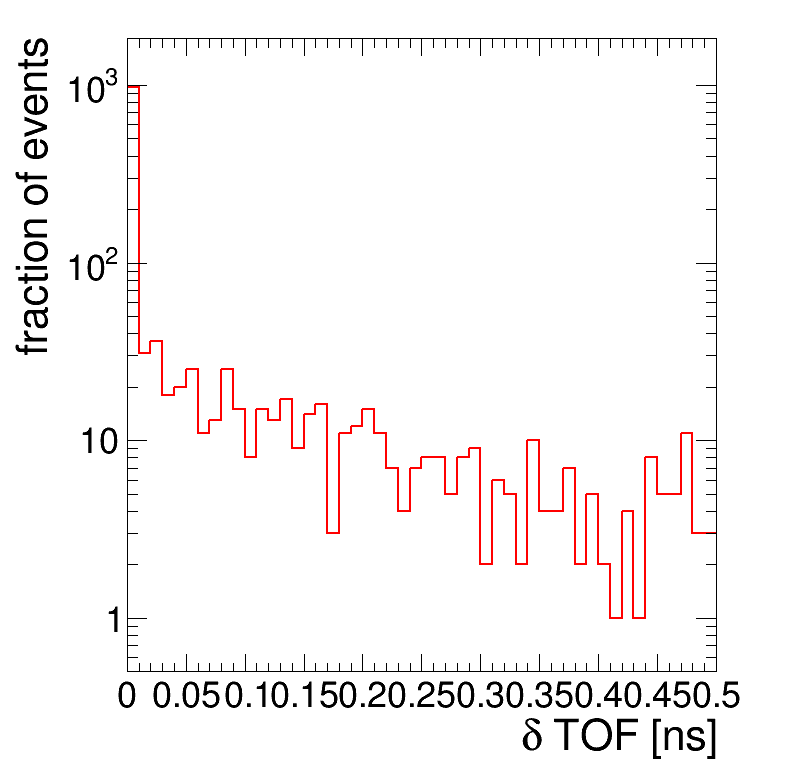

In [113]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    dt = pho_dt.flatten()
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,0.5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


In [115]:
x = np.arange(5)
# np.logical_not(x<3,x>2)

array([False, False, False,  True,  True])

i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca6822e8>
tof [9.941999  5.097539  4.9892826 4.3471794]
tmax [9.941999  5.1207757 5.1207757 4.3471794]
tmin [9.941999  4.9659467 4.9659467 4.3104525]
dt [0.         0.15482903 0.15482903 0.03672695]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_all.png has been created


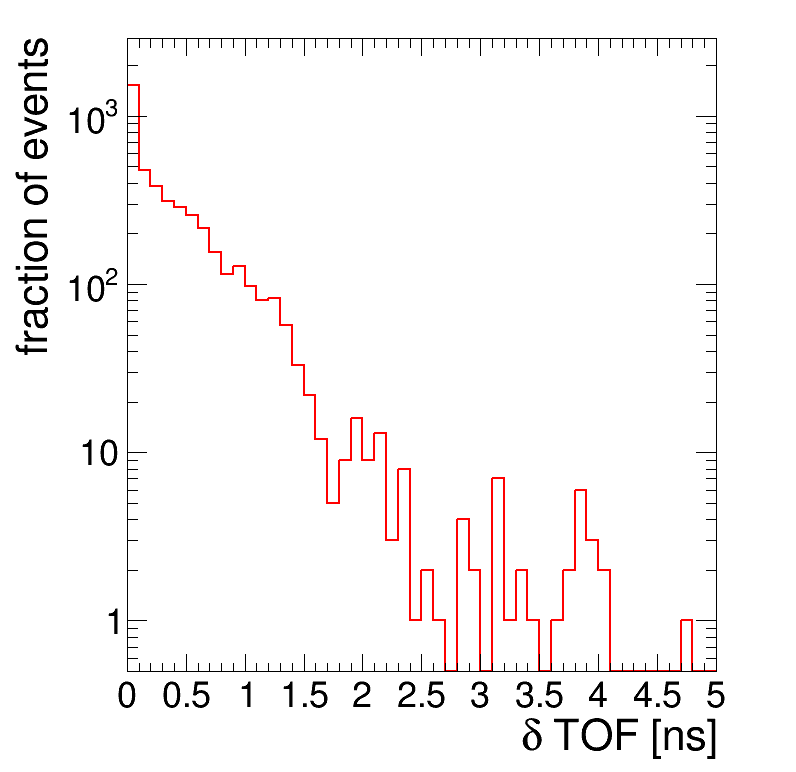

In [146]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_02'].array()
    pho_tmax = v['g_tmax_sc_02'].array()
    pho_tmin = v['g_tmin_sc_02'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_all.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca6822e8>
tof [5.097539  4.9892826 4.3471794]
tmax [5.1207757 5.1207757 4.3471794]
tmin [4.9659467 4.9659467 4.3104525]
dt [0.15482903 0.15482903 0.03672695]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap.png has been created


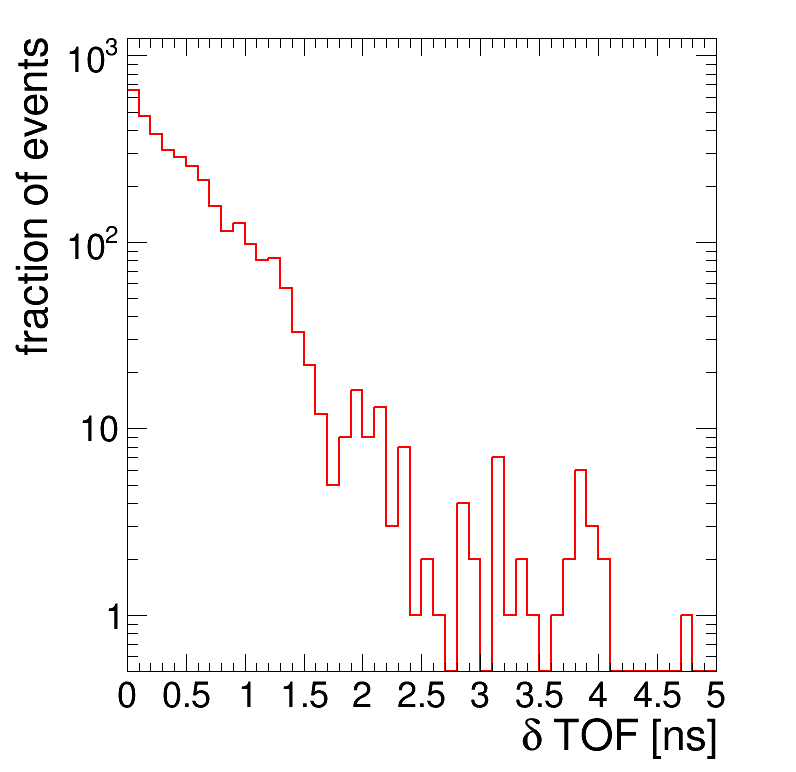

In [148]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_02'].array()
    cnt = v['g_cnt_sc_02'].array()
    pho_tmax = v['g_tmax_sc_02'].array()
    pho_tmin = v['g_tmin_sc_02'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca6822e8>
tof [9.941999]
tmax [9.941999]
tmin [9.941999]
dt [0.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_single.png has been created


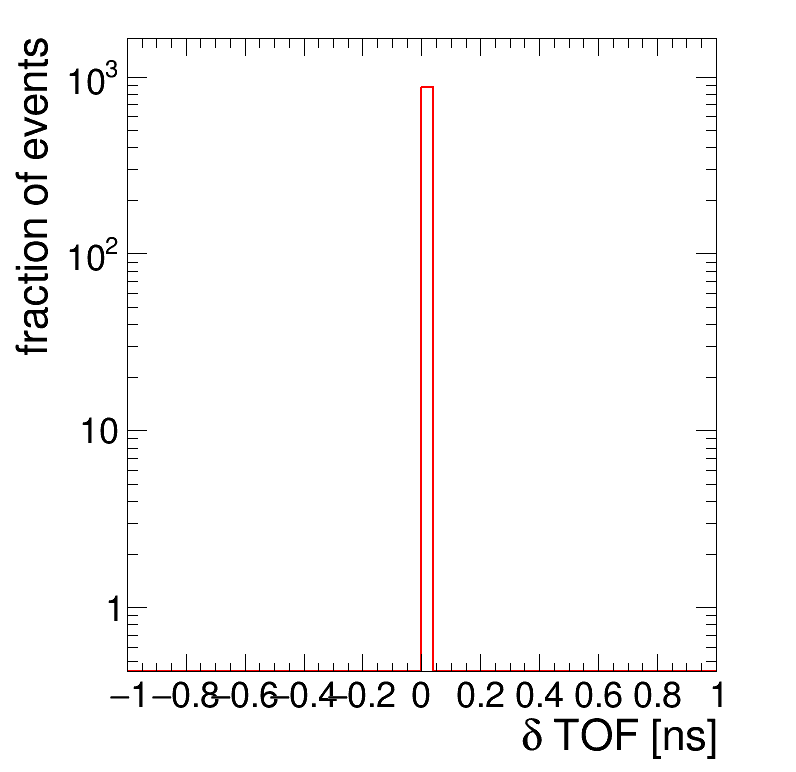

In [149]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_02'].array()
    cnt = v['g_cnt_sc_02'].array()
    pho_tmax = v['g_tmax_sc_02'].array()
    pho_tmin = v['g_tmin_sc_02'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(cnt==1, 1)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-1,1])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_single.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7faeaac92278>
tof [9.941999  5.097539  4.9892826 4.3471794]
tmax [9.941999  5.1207757 5.1207757 4.3471794]
tmin [9.941999  4.9659467 4.9659467 4.3471794]
dt [0.         0.15482903 0.15482903 0.        ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_cnt_in_eb_e5_all_cone01.png has been created


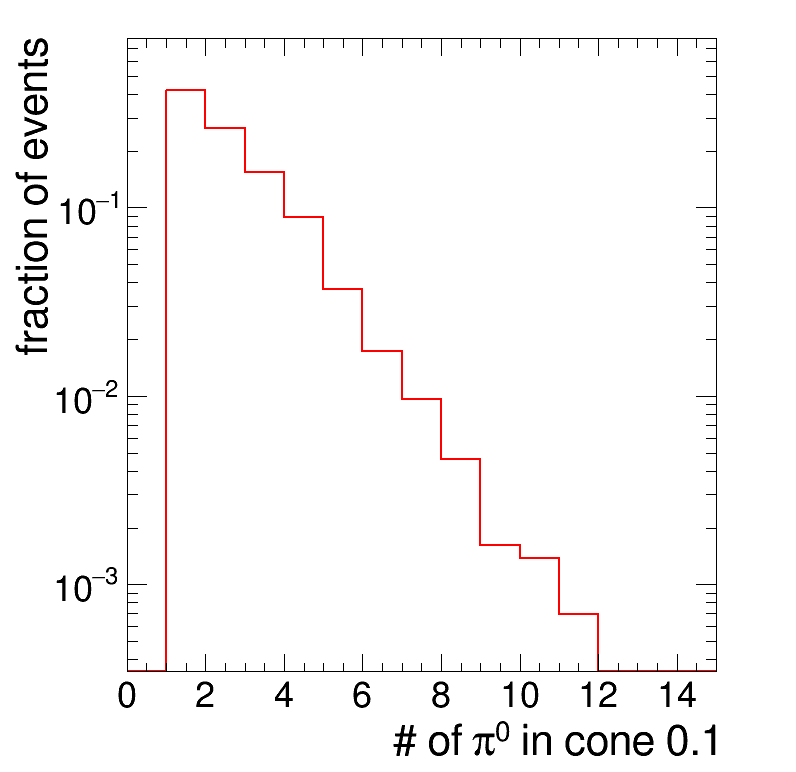

In [250]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_cnt = cnt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
    cnt1 = pho_cnt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( cnt1, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_cnt_in_eb_e5_all_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7faeaac92278>
tof [9.941999  5.097539  4.9892826 4.3471794]
tmax [9.941999  5.1207757 5.1207757 4.3471794]
tmin [9.941999  4.9659467 4.9659467 4.3471794]
dt [0.         0.15482903 0.15482903 0.        ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_cnt_sm_in_eb_e5_all_cone01.png has been created


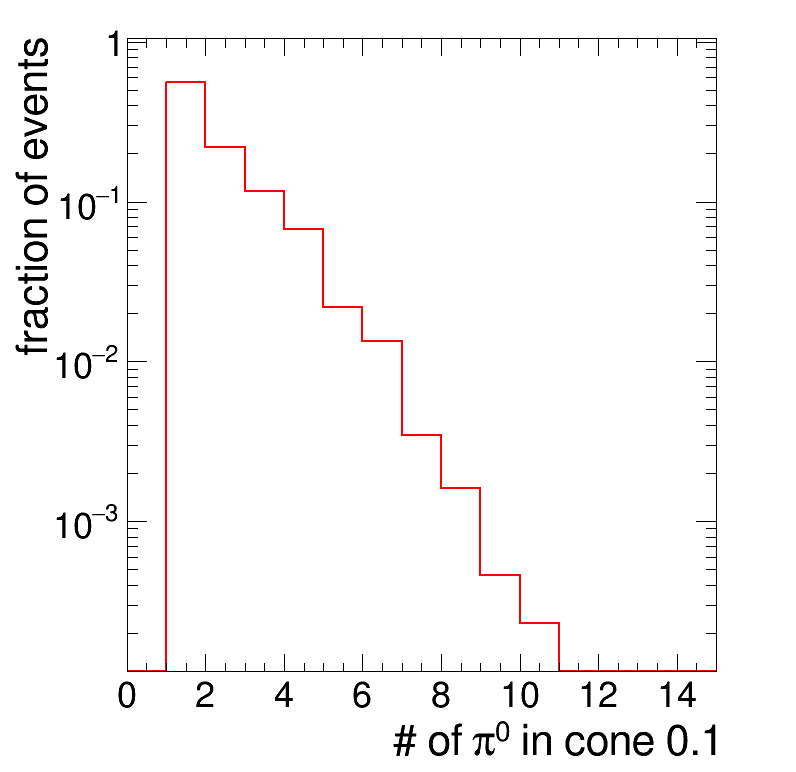

In [251]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sm_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_cnt = cnt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
    cnt1 = pho_cnt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( cnt1, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_cnt_sm_in_eb_e5_all_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca6822e8>
tof [9.941999  5.097539  4.9892826 4.3471794]
tmax [9.941999  5.1207757 5.1207757 4.3471794]
tmin [9.941999  4.9659467 4.9659467 4.3471794]
dt [0.         0.15482903 0.15482903 0.        ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_all_cone01.png has been created


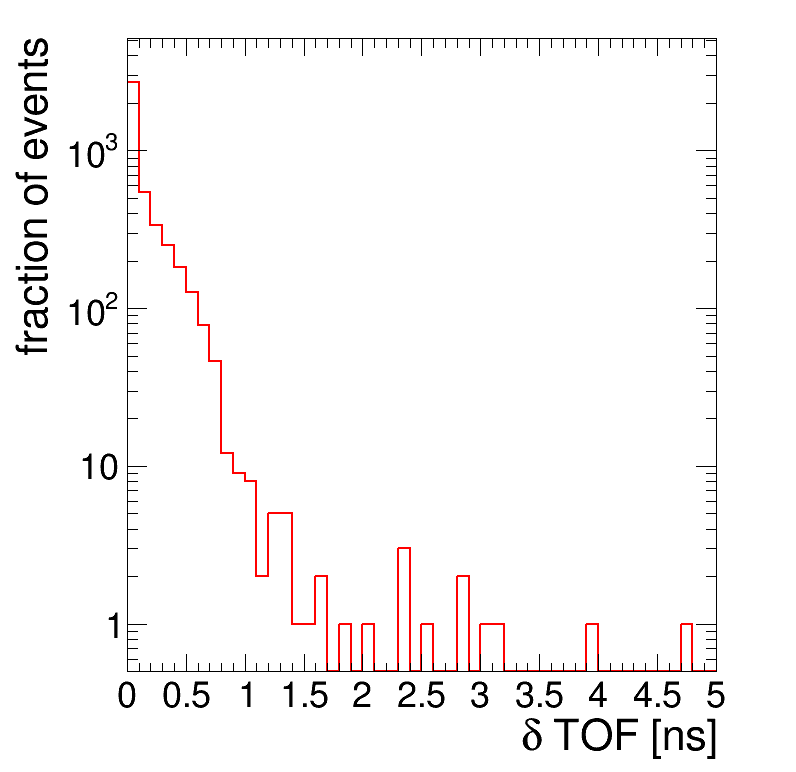

In [150]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_all_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca517ef0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01.png has been created


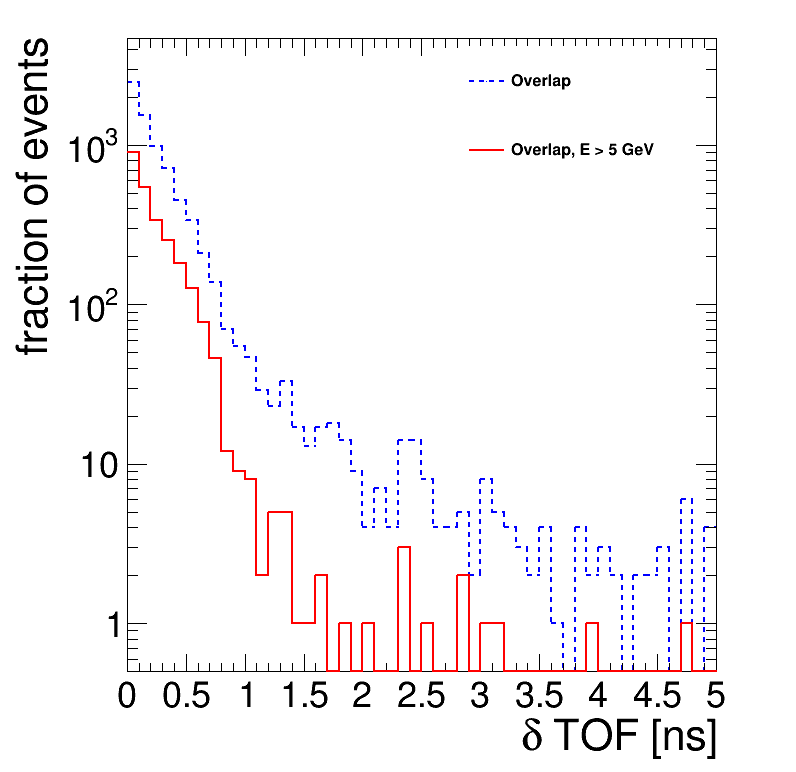

In [232]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_basic_string, pho_time_not_equal_string)
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht2.SetLineStyle(7)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht2.Draw('same')
    ht0.Draw('same')
#     ht2.DrawNormalized('')

    leg.AddEntry(ht2, 'Overlap')
    leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7faeaac92278>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01.png has been created


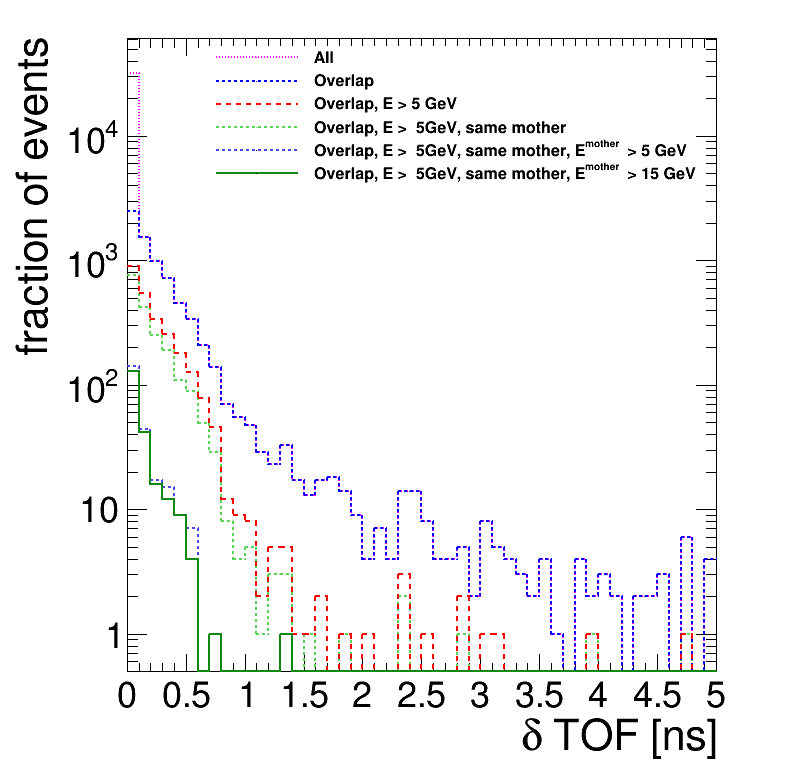

In [274]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.25,0.76,0.83,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>1, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_basic_string, pho_time_not_equal_string)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f3_string, pho_e_sm_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f3_string, pho_e2_sm_string)
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt[pho_pair_basic_string]
    pho_dt5 = pho_dt_sm[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm[pho_pair_f6_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
#     ht5.SetLineColor(std_color_list[i+5])
#     ht5.SetMarkerColor(std_color_list[i+5])

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
#     ht3.SetLineStyle(2)
    ht6.SetLineColor(209)
    
    ht4.Draw('same')
    ht3.Draw('same')
    ht2.Draw('same')
    ht0.Draw('same')
    ht5.Draw('same')
    ht6.Draw('same')

#     ht4.DrawNormalized('same')
#     ht3.DrawNormalized('same')
#     ht2.DrawNormalized('same')
#     ht0.DrawNormalized('same')

    leg.AddEntry(ht4, 'All')
    leg.AddEntry(ht2, 'Overlap')
    leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
    leg.AddEntry(ht3, 'Overlap, E >  5GeV, same mother')
    leg.AddEntry(ht5, 'Overlap, E >  5GeV, same mother, E^{mother} > 5 GeV')
    leg.AddEntry(ht6, 'Overlap, E >  5GeV, same mother, E^{mother} > 15 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7ff7c186b9e8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_norm.png has been created


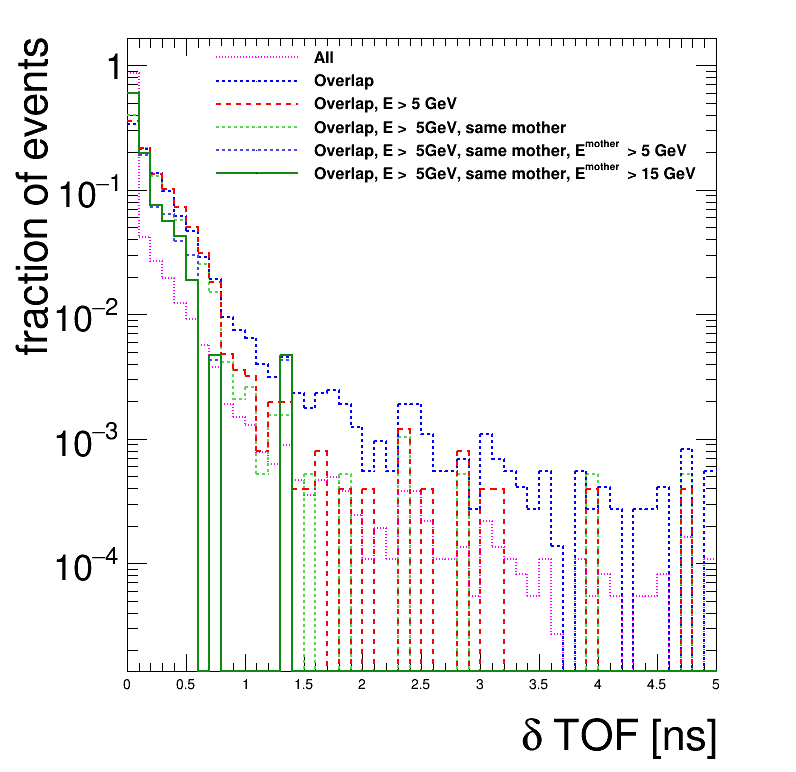

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.25,0.76,0.83,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>1, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_basic_string, pho_time_not_equal_string)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f3_string, pho_e_sm_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f3_string, pho_e2_sm_string)
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt[pho_pair_basic_string]
    pho_dt5 = pho_dt_sm[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm[pho_pair_f6_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
#     ht5.SetLineColor(std_color_list[i+5])
#     ht5.SetMarkerColor(std_color_list[i+5])

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,5])
#     ht3.SetLineStyle(2)
    ht6.SetLineColor(209)
    
#     ht4.Draw('same')
#     ht3.Draw('same')
#     ht2.Draw('same')
#     ht0.Draw('same')
#     ht5.Draw('same')
#     ht6.Draw('same')

    ht4.DrawNormalized('same')
    ht3.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht0.DrawNormalized('same')
    ht5.DrawNormalized('same')
    ht6.DrawNormalized('same')

    leg.AddEntry(ht4, 'All')
    leg.AddEntry(ht2, 'Overlap')
    leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
    leg.AddEntry(ht3, 'Overlap, E >  5GeV, same mother')
    leg.AddEntry(ht5, 'Overlap, E >  5GeV, same mother, E^{mother} > 5 GeV')
    leg.AddEntry(ht6, 'Overlap, E >  5GeV, same mother, E^{mother} > 15 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_norm.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7ff7c186b9e8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_smallrange.png has been created


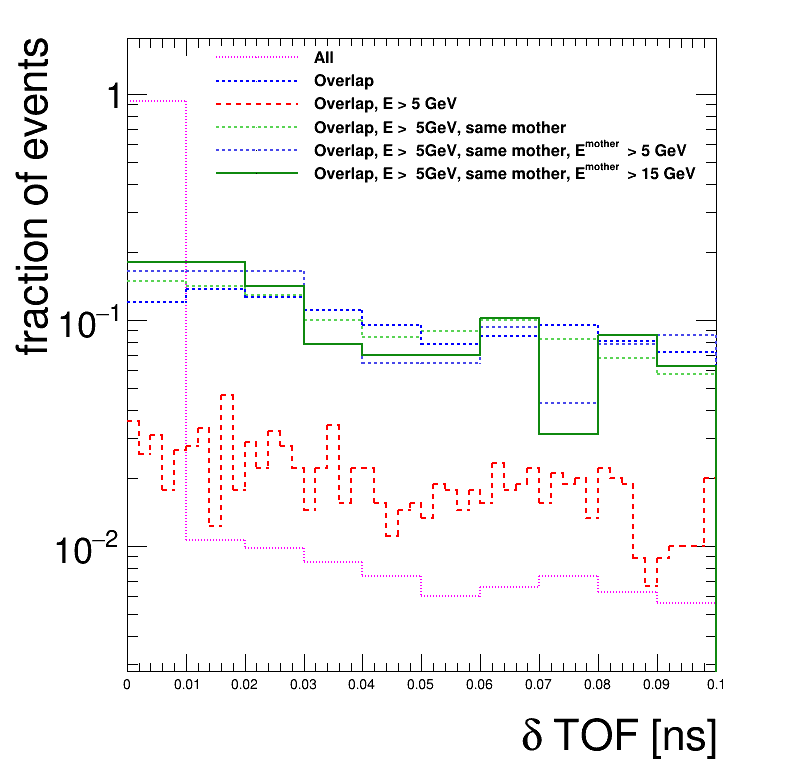

In [8]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.25,0.76,0.83,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>1, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_basic_string, pho_time_not_equal_string)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f3_string, pho_e_sm_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f3_string, pho_e2_sm_string)
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt[pho_pair_basic_string]
    pho_dt5 = pho_dt_sm[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm[pho_pair_f6_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-0,0.1])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,0.1])
    ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,0.1])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,0.1])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,0.1])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
#     ht5.SetLineColor(std_color_list[i+5])
#     ht5.SetMarkerColor(std_color_list[i+5])

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,0.1])
#     ht3.SetLineStyle(2)
    ht6.SetLineColor(209)
    
#     ht4.Draw('same')
#     ht3.Draw('same')
#     ht2.Draw('same')
#     ht0.Draw('same')
#     ht5.Draw('same')
#     ht6.Draw('same')

    ht4.DrawNormalized('same')
    ht3.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht0.DrawNormalized('same')
    ht5.DrawNormalized('same')
    ht6.DrawNormalized('same')
     
    leg.AddEntry(ht4, 'All')
    leg.AddEntry(ht2, 'Overlap')
    leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
    leg.AddEntry(ht3, 'Overlap, E >  5GeV, same mother')
    leg.AddEntry(ht5, 'Overlap, E >  5GeV, same mother, E^{mother} > 5 GeV')
    leg.AddEntry(ht6, 'Overlap, E >  5GeV, same mother, E^{mother} > 15 GeV')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_smallrange.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm.root <TTree b'ecalTPTree' at 0x7faeaac92278>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_cnt_and_sm_in_eb_e5_all_cone01.png has been created


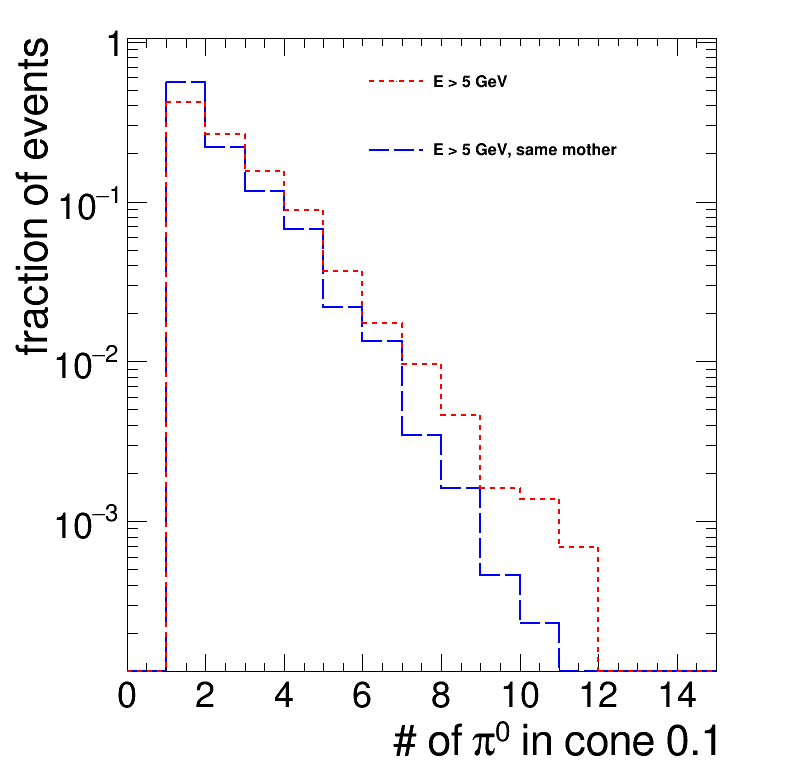

In [255]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
    pho_time_sm_not_equal_string = np.logical_and(cnt_sm>1, 1 )
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f3_string = np.logical_and(pho_pair_f1_string, pho_time_sm_not_equal_string)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
    
 
    pho_cnt = cnt[pho_pair_f_string]
    pho_cnt_sm = cnt_sm[pho_pair_f_string]
   
    cnt1 = pho_cnt.flatten()
    cnt2 = pho_cnt_sm.flatten()
 
    
    ht0 = create_TH1D( cnt1, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
 
    hts = create_TH1D( cnt2, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    hts.SetLineStyle(9)
    hts.SetLineColor(std_color_list[i+2])
    hts.SetMarkerColor(std_color_list[i+2])
    
 
    hts.DrawNormalized('same')
    ht0.DrawNormalized('same')
    
    leg.AddEntry(ht0, 'E > 5 GeV')
    leg.AddEntry(hts, 'E > 5 GeV, same mother')
 
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_cnt_and_sm_in_eb_e5_all_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca6822e8>
tof [9.941999  4.3471794]
tmax [9.941999  4.3471794]
tmin [9.941999  4.3471794]
dt [0. 0.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_single_cone01.png has been created


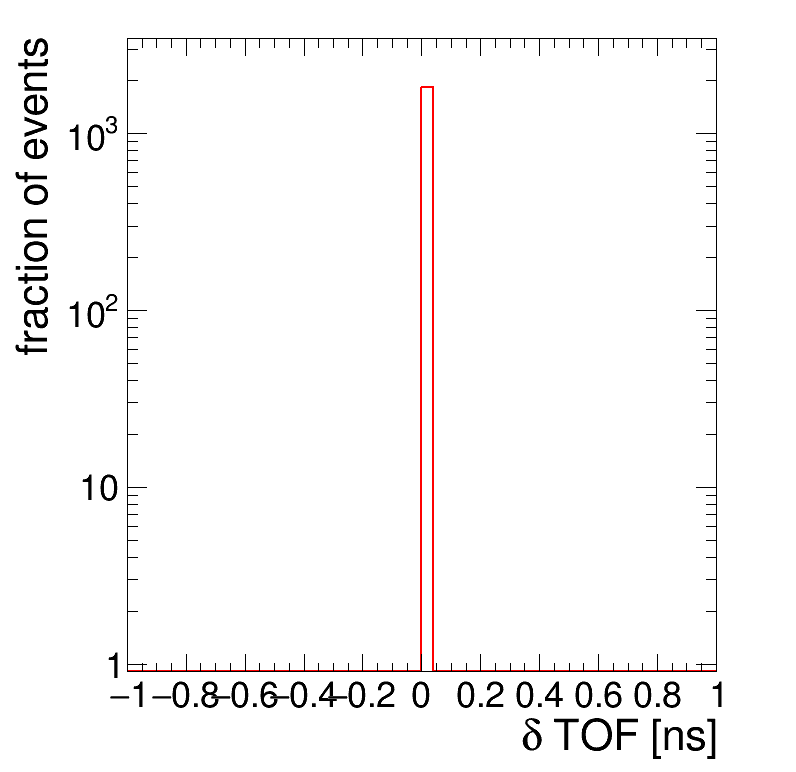

In [153]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(cnt==1, 1)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-1,1])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_single_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [0.06859589 0.06784201]
 FCN=44.4428 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.10522e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.92566e+02   6.23819e+00   1.74027e-02  -2.38154e-07
   2  Mean        -9.83751e-03   6.35124e-03   2.06622e-05  -2.14628e-03
   3  Sigma        2.21605e-01   4.06669e-03   1.68019e-05   5.49297e-04


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_in_eb_e5_overlap_cone01.png has been created


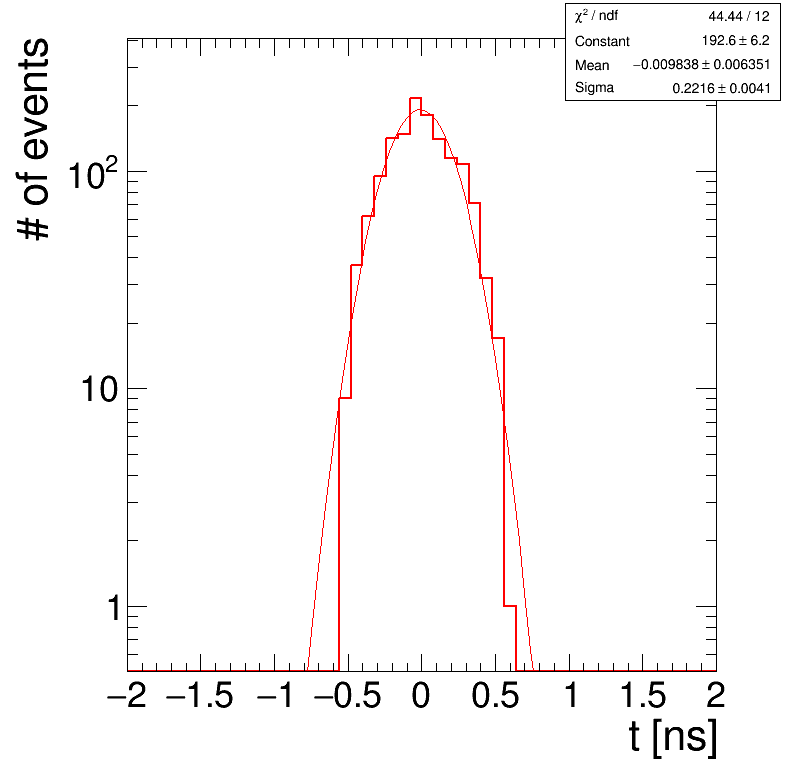

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt 0.06667166
 FCN=7.53876 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.69284e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.68656e+02   6.42586e+00   7.63865e-03   9.03216e-07
   2  Mean        -1.41743e-03   6.02628e-03   8.59654e-06  -3.73004e-04
   3  Sigma        1.88123e-01   4.03425e-03   8.48883e-06  -2.48822e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_vtx_time_in_eb_e5_overlap_cone01.png has been created


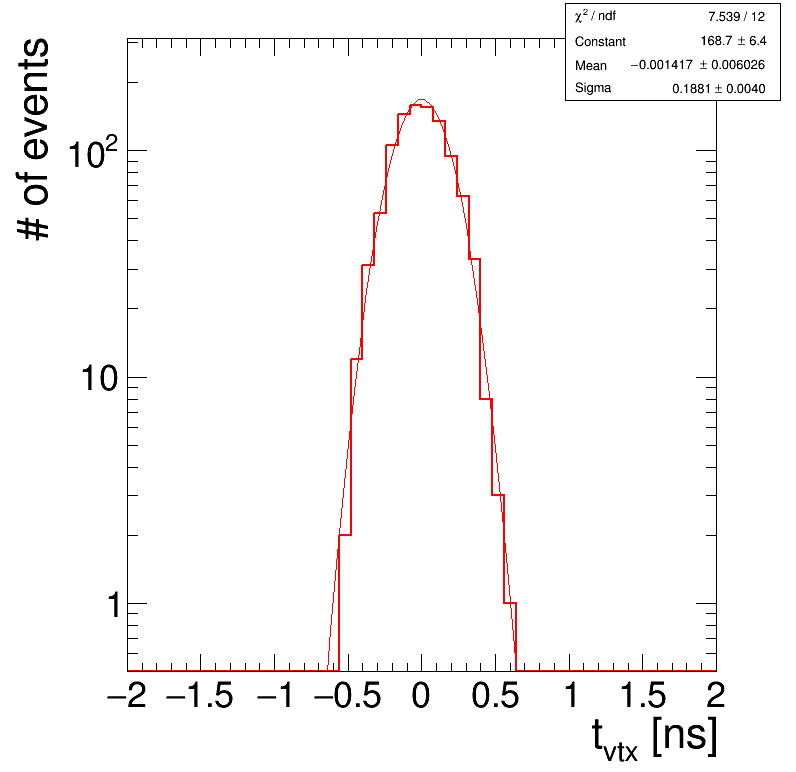

In [139]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['genVertexT'].array()
#     pho_dt = v['gen_time'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt
#     pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t_{vtx} [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_vtx_time_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt -0.0602113
 FCN=30.7689 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.95172e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.45525e+01   3.14778e+00   6.59101e-03  -2.50748e-04
   2  Mean        -1.14639e-01   1.35120e-01   3.71921e-04   1.21225e-04
   3  Sigma        4.15877e+00   1.16552e-01   1.94822e-05  -7.35113e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_vtx_z_in_eb_e5_overlap_cone01.png has been created


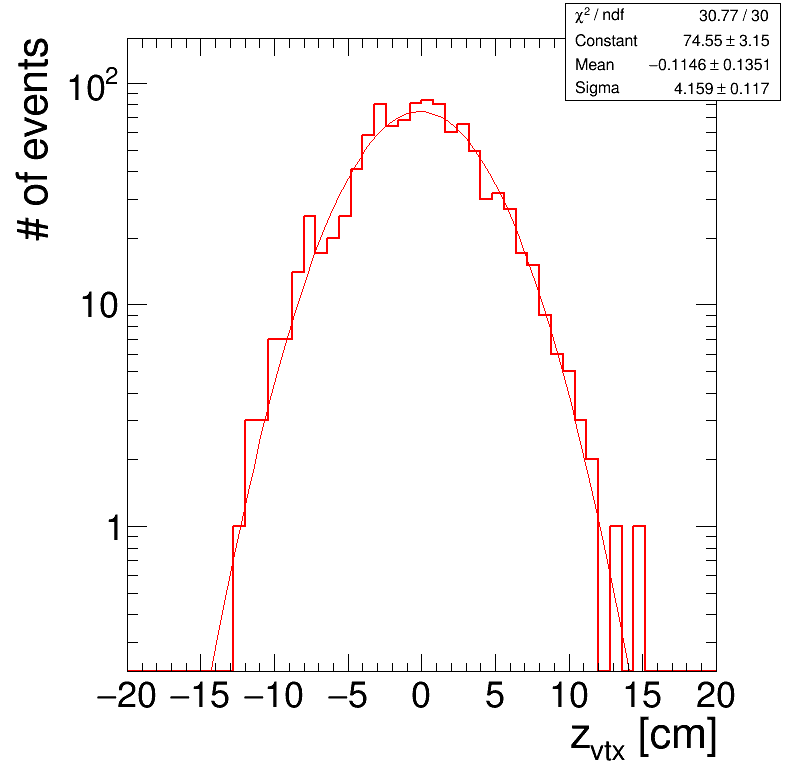

In [140]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['genVertexZ'].array()
#     pho_dt = v['gen_time'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt
#     pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['z_{vtx} [cm]', '# of events'], name="", binning=[50,-20,20])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_vtx_z_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f55329404a8>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [-0.0602113 -0.0602113]
 FCN=93.0752 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=9.01985e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.30303e+01   3.37998e+00   1.23250e-02   2.21005e-06
   2  Mean        -1.88357e-01   1.26159e-01   5.97145e-04   9.49009e-05
   3  Sigma        4.40759e+00   1.06849e-01   2.89237e-05   9.31830e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_prod_vtx_z_in_eb_e5_overlap_cone01.png has been created


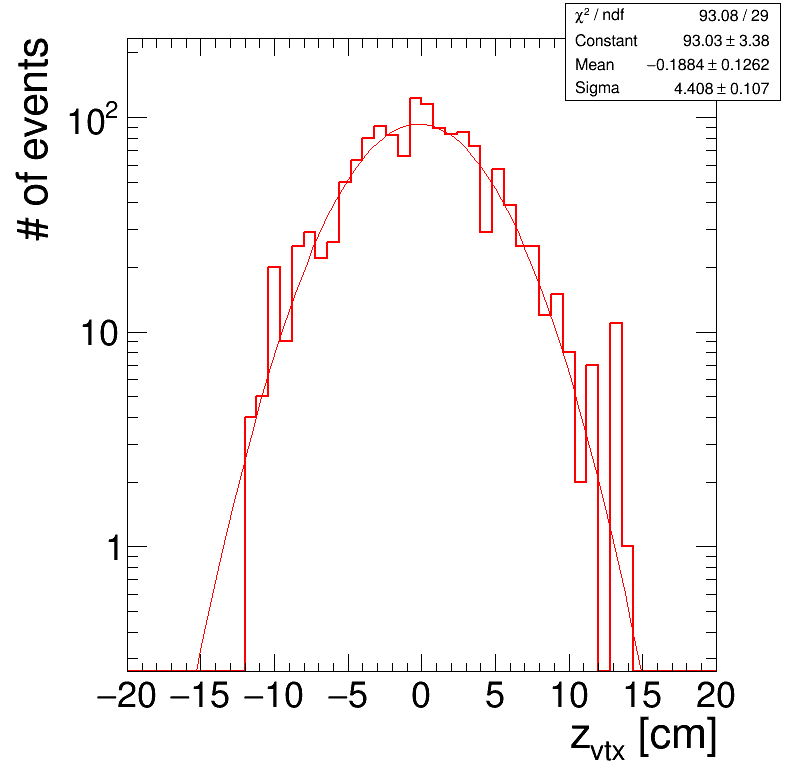

In [42]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gParticle_prod_vtx_z'].array()
#     pho_dt = v['gen_time'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
#     pho_dt = pho_dt
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['z_{vtx} [cm]', '# of events'], name="", binning=[50,-20,20])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_prod_vtx_z_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


In [209]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    BS_Time = v['genVertexT'].array()
    pho_gent = v['gen_time'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    

    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
 #     pho_gent = pho_gent[pho_pair_f_string]
#     BS_Time = BS_Time[pho_pair_f_string]
    
    phoTime = [x-y for x,y in zip(pho_gent,BS_Time)]
#     phoTime = np.array(phoTime)
    
    SmearTime = np.random.normal(0,0.193,len(BS_Time))
    phoNewTime = [x+y for x,y in zip(phoTime,SmearTime)]
    print(phoTime[1], BS_Time[1], SmearTime[1],phoNewTime[1])
    phoNewTime_a = np.array(phoNewTime)
    print(type(pho_gent),type(phoTime), type(phoNewTime), type(phoNewTime_a))
    
 
    
    pho_newt = phoNewTime_a[pho_pair_f_string]
    pho_newt = np.array(pho_newt)
  
    
  
 
    gent = pho_newt.flatten()
 
    
    ht0 = create_TH1D( gent, axis_title=['#delta TOF [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_BS193ps_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-SC-dt-fix.root <TTree b'ecalTPTree' at 0x7faeca517ef0>
[-6.6606665e+02 -6.6606665e+02 -6.6606665e+02 ... -2.1979213e-06
 -3.0212849e-04 -3.1500310e-04] 0.06667166 0.10000862374207607 [-6.65966614e+02 -6.65966614e+02 -6.65966614e+02 ...  1.00006424e-01
  9.97064933e-02  9.96936187e-02]
<class 'awkward.array.jagged.JaggedArray'> <class 'list'> <class 'list'> <class 'numpy.ndarray'>


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [0.06859589 0.06784201]
 FCN=44.4428 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.10505e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.92566e+02   6.23819e+00   1.74027e-02  -2.38065e-07
   2  Mean        -9.83751e-03   6.35124e-03   2.06622e-05  -2.14611e-03
   3  Sigma        2.21605e-01   4.06669e-03   1.68019e-05   5.49297e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_max_01_in_eb_e5_overlap_cone01.png has been created


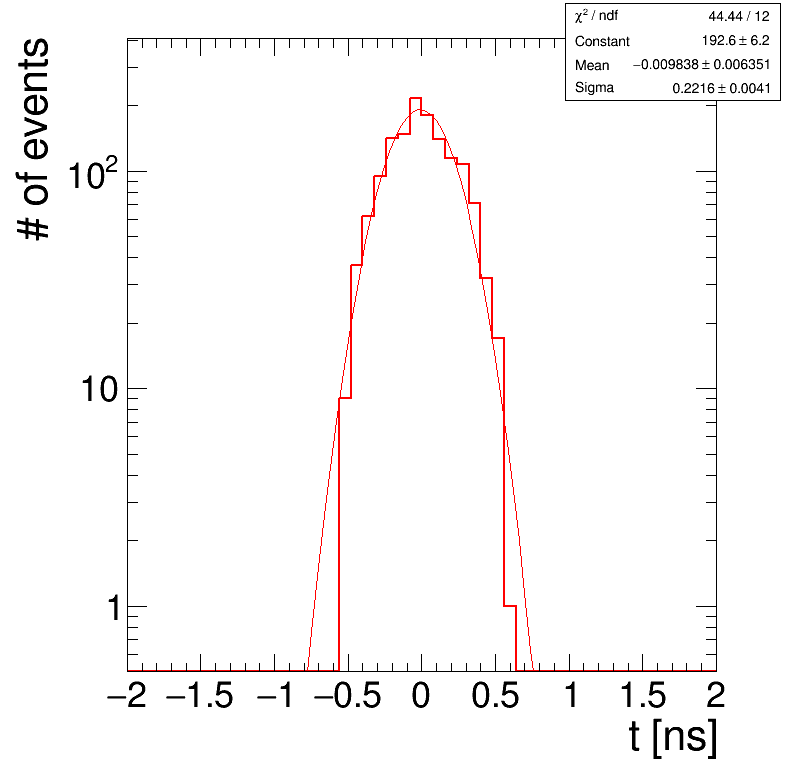

In [137]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_max_01_in_eb_e5_overlap_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


# E > 1 GeV

In [32]:
directory = '/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/ttbar/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190814/'
# directory = '/nfshome/jmao/cms-llp/plots/20190814/'

# fname = {'analyzer-dyll-4FEVT-jet-SC-dt-fix.root'}
fname = {'analyzer-dyll-4FEVT-dt-fix-sm-e10.root'}
# fname = {'analyzer-dyll-4FEVT-dt-fix-sm-e1.root'}
# fname = {'analyzer-dyll-4FEVT-dt-fix-sm.root'}
# fname = {'analyzer-dyll-4FEVT-SC-dt-fix.root'}
# fname = {'analyzer-dyll-4FEVT-SC-dt.root'}
# fname = {'analyzer-dyll-4FEVT-SC.root'}
# fname = {'analyzer-dyll-4FEVT-ak4jetnonu.root'}
# fname = {'analyzer-dyll-4FEVT-jet.root'}
# fname = {'analyzer-dyll-4FEVT-pi0cluster1000.root'}

tree = OrderedDict()

 

for file in fname:
#     print(directory+file)
    root_dir = uproot.open(directory+file) 
    print ('Open ready')

    tree[file] = root_dir['L1EcalTimingAnalyzer/ecalTPTree']
    print ('Tree ready')    
#     print (tree[file],file)

Open ready
Tree ready


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_cnt_and_e1_in_eb_e5_all_cone01.png has been created


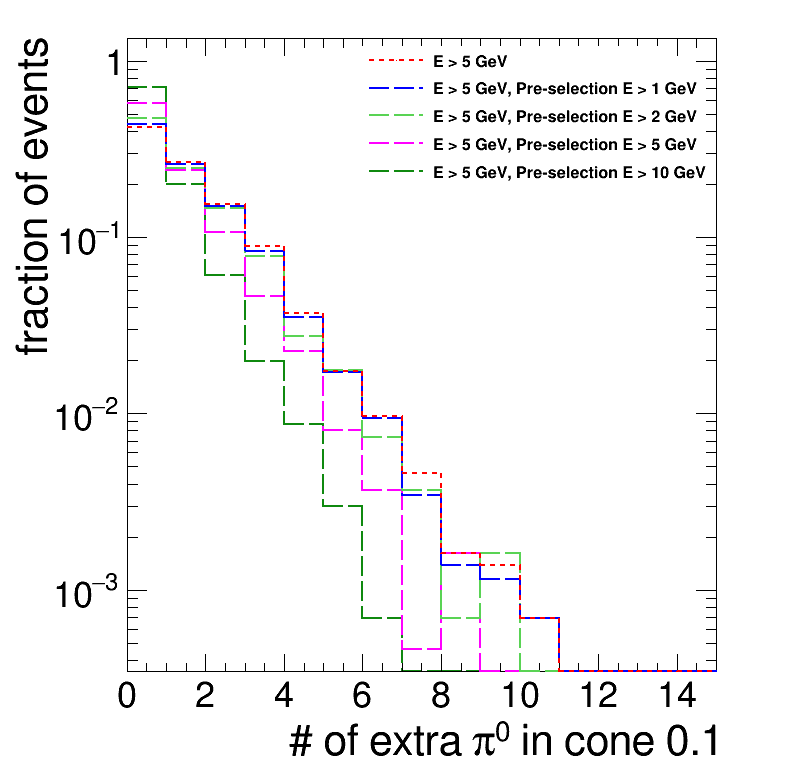

In [60]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
    pho_time_sm_not_equal_string = np.logical_and(cnt_sm>1, 1 )
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f3_string = np.logical_and(pho_pair_f1_string, pho_time_sm_not_equal_string)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    
 
    pho_cnt = cnt[pho_pair_f_string]
    pho_cnt_sm = cnt_sm[pho_pair_f_string]
    pho_cnt_sm2 = cnt_sm2[pho_pair_f_string]
    pho_cnt_sm5 = cnt_sm5[pho_pair_f_string]
    pho_cnt_sm10 = cnt_sm10[pho_pair_f_string]
   
    cnt1 = pho_cnt.flatten()
    cnt2 = pho_cnt_sm.flatten()
    cnt3 = pho_cnt_sm2.flatten()
    cnt4 = pho_cnt_sm5.flatten()
    cnt5 = pho_cnt_sm10.flatten()
 
    
    ht0 = create_TH1D( cnt1, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
 
    hts = create_TH1D( cnt2, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    hts.SetLineStyle(9)
    hts.SetLineColor(std_color_list[i+2])
    hts.SetMarkerColor(std_color_list[i+2])

    hts2 = create_TH1D( cnt3, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    hts2.SetLineStyle(9)
    hts2.SetLineColor(std_color_list[i+3])
    hts2.SetMarkerColor(std_color_list[i+3])
    
    hts5 = create_TH1D( cnt4, axis_title=['# of #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    hts5.SetLineStyle(9)
    hts5.SetLineColor(std_color_list[i+4])
    hts5.SetMarkerColor(std_color_list[i+4])
    
    hts10 = create_TH1D( cnt5, axis_title=['# of extra #pi^{0} in cone 0.1', 'fraction of events'], name="", binning=[15,-0,15])
    hts10.SetLineStyle(9)
    hts10.SetLineColor(209)
    hts10.SetMarkerColor(209)
    
 
    hts10.DrawNormalized('same')
    hts5.DrawNormalized('same')
    hts2.DrawNormalized('same')
    hts.DrawNormalized('same')
    ht0.DrawNormalized('same')
    
    leg.AddEntry(ht0, 'E > 5 GeV')
    leg.AddEntry(hts, 'E > 5 GeV, Pre-selection E > 1 GeV')
    leg.AddEntry(hts2, 'E > 5 GeV, Pre-selection E > 2 GeV')
    leg.AddEntry(hts5, 'E > 5 GeV, Pre-selection E > 5 GeV')
    leg.AddEntry(hts10, 'E > 5 GeV, Pre-selection E > 10 GeV')
 
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_cnt_and_e1_in_eb_e5_all_cone01.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>
<class 'awkward.array.jagged.JaggedArray'> <class 'awkward.array.jagged.JaggedArray'> <class 'numpy.ndarray'>
[-6.6600000e+02 -6.6600000e+02 -6.6600000e+02 ...  0.0000000e+00
  2.9549599e-02  2.5277615e-02] [0.15482903 0.15482903] 0.0
<class 'awkward.array.jagged.JaggedArray'> <class 'awkward.array.jagged.JaggedArray'> <class 'awkward.array.jagged.JaggedArray'> <class 'numpy.ndarray'>
[-666.        -666.        -666.        ...    4.3004756    4.349433
    4.345161 ] [-666.        -666.        -666.        ...    4.3004756    4.3198833
    4.3198833] [4.9892826 5.097539 ] [4.9659467 4.9659467] 0.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_norm_e10.png has been created


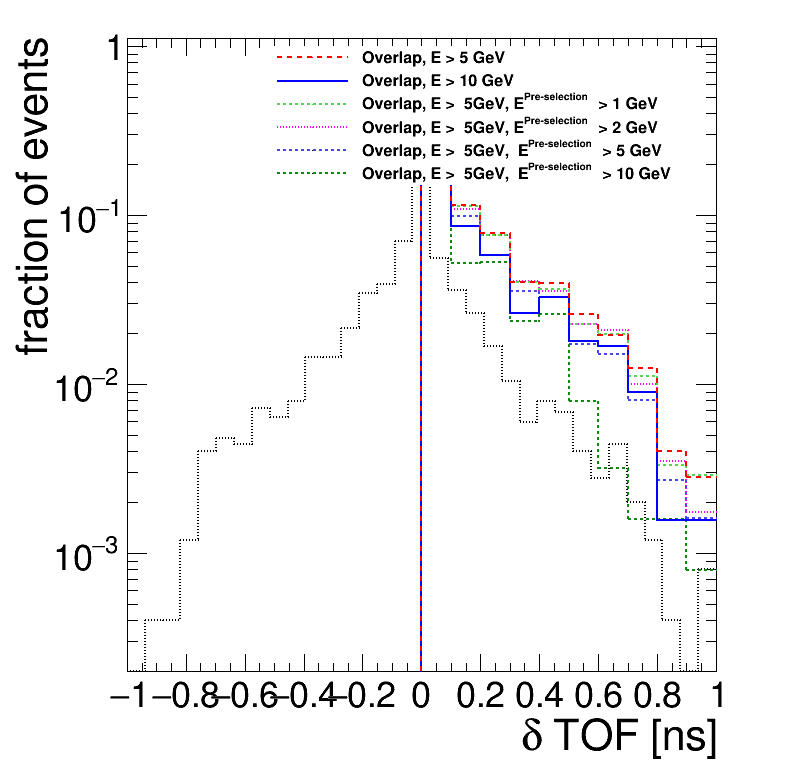

In [36]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.33,0.76,0.83,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    pho_dt_sm2 = v['g_dt_sm2_01'].array()
    pho_dt_sm5 = v['g_dt_sm5_01'].array()
    pho_dt_sm10 = v['g_dt_sm10_01'].array()
    pho_e_max = v['g_e_max_01'].array()
    pho_t_max = v['g_t_max_01'].array()
    pho_dt_max = v['g_dt_max_01'].array()
    pho_dt_min = v['g_dt_min_01'].array()
    pho_e_min = v['g_e_min_01'].array()
    pho_t_min = v['g_t_min_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>0, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>0, 1 )
    pho_time_not_equal_sm2_string = np.logical_and(cnt_sm2>0, 1 )
    pho_time_not_equal_sm5_string = np.logical_and(cnt_sm5>0, 1 )
    pho_time_not_equal_sm10_string = np.logical_and(cnt_sm10>0, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
   
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_e>10)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f4_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm2_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm5_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm10_string)
    pho_pair_f7_string = np.logical_and(pho_pair_f1_string, pho_e_max>5)
    pho_pair_f8_string = np.logical_and(pho_pair_f1_string, pho_e_min>5)
    
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)

    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt_sm2[pho_pair_f4_string]
    pho_dt5 = pho_dt_sm5[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm10[pho_pair_f6_string]
    pho_dt7 = pho_dt_max[pho_pair_f7_string]
  
    pho_t_max_01 = pho_t_max[pho_pair_f_string]
    pho_t_min_01 = pho_t_min[pho_pair_f_string]
    
    pho_dt9 = [x-y for x,y in zip(pho_t_max_01,pho_t_min_01)]
    
    pho_dt9 = np.array(pho_dt9)
  
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
    dt7 = pho_dt7.flatten()
    dt8 = pho_dt8.flatten()
#     dt9 = pho_dt9.flatten()

    dt9 = []
    for k, x in enumerate(pho_dt9):
        for j,y in enumerate(x):
            dt9.append(y)
    
    dt9 = np.array(dt9)
    
#     dt9 = pho_dt9
    
    print(type(pho_dt),type(pho_dt1),type(dt))
    print(pho_dt[1],pho_dt1[1],dt[1])
    print(type(pho_t_max),type(pho_t_max_01),type(pho_t_min_01),type(dt9))
    print(pho_t_max[1],pho_t_min[1],pho_t_max_01[1],pho_t_min_01[1],dt9[1])
 
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,1.])
#     ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
 

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht6.SetLineStyle(2)
    ht6.SetLineColor(209)
    
    ht7 = create_TH1D( dt7, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[33,-0.1,1.])
    ht7.SetLineStyle(3)
    ht7.SetLineColor(109)
    
    ht8 = create_TH1D( dt8, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[33,-0.1,1.])
#     ht8.GetYaxis().SetRangeUser(0, 1e+5)
#     ht8.GetYaxis().SetMaximum(1e+5)
    ht8.SetLineStyle(2)
    ht8.SetLineColor(51)
    
    ht9 = create_TH1D( dt9, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[33,-1,1.])
    ht9.SetLineStyle(3)
    ht9.SetLineColor(109)
    
 
 #     ht8.Draw('same')
#     ht7.Draw('same')
#     ht6.Draw('same')
#     ht5.Draw('same')
#     ht0.Draw('same')
        
 #     ht2.DrawNormalized('same')
    ht9.DrawNormalized('same')
#     ht8.DrawNormalized('same')
#     ht8.Scale(100*ht8.GetMaximum())
#     ht7.DrawNormalized('same')
    ht6.DrawNormalized('same')
    ht5.DrawNormalized('same')
    ht4.DrawNormalized('same')
    ht3.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht0.DrawNormalized('same')
 


 
    leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
    leg.AddEntry(ht2, 'Overlap, E > 10 GeV')
    leg.AddEntry(ht3, 'Overlap, E >  5GeV, E^{Pre-selection} > 1 GeV')
    leg.AddEntry(ht4, 'Overlap, E >  5GeV, E^{Pre-selection} > 2 GeV')
    leg.AddEntry(ht5, 'Overlap, E >  5GeV,  E^{Pre-selection} > 5 GeV')
    leg.AddEntry(ht6, 'Overlap, E >  5GeV,  E^{Pre-selection} > 10 GeV')
#     leg.AddEntry(ht7, 'Overlap, E >  5GeV, E^{max} > 5 GeV')
#     leg.AddEntry(ht8, 'Overlap, E >  5GeV, E^{min} > 5 GeV')
 
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_norm_e10.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_norm_max_min.png has been created


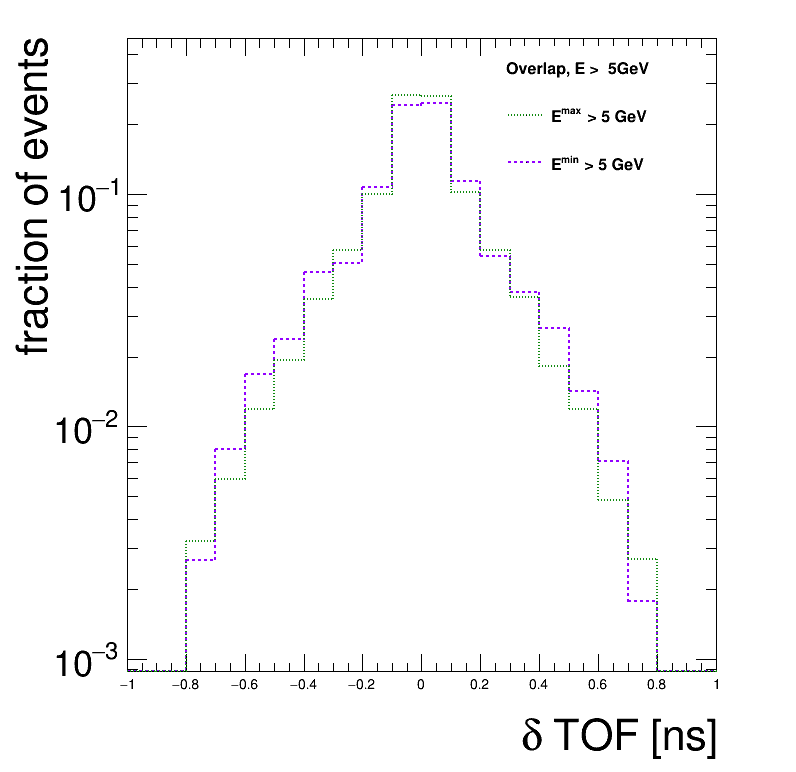

In [130]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    pho_dt_sm2 = v['g_dt_sm2_01'].array()
    pho_dt_sm5 = v['g_dt_sm5_01'].array()
    pho_dt_sm10 = v['g_dt_sm10_01'].array()
    pho_e_max = v['g_e_max_01'].array()
    pho_dt_max = v['g_dt_max_01'].array()
    pho_dt_min = v['g_dt_min_01'].array()
    pho_e_min = v['g_e_min_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>0, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>0, 1 )
    pho_time_not_equal_sm2_string = np.logical_and(cnt_sm2>0, 1 )
    pho_time_not_equal_sm5_string = np.logical_and(cnt_sm5>0, 1 )
    pho_time_not_equal_sm10_string = np.logical_and(cnt_sm10>0, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
   
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_e>10)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f4_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm2_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm5_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm10_string)
    pho_pair_f7_string = np.logical_and(pho_pair_f1_string, pho_e_max>5)
    pho_pair_f8_string = np.logical_and(pho_pair_f1_string, pho_e_min>5)
    
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt_sm2[pho_pair_f4_string]
    pho_dt5 = pho_dt_sm5[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm10[pho_pair_f6_string]
    pho_dt7 = pho_dt_max[pho_pair_f7_string]
    pho_dt8 = pho_dt_min[pho_pair_f8_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
    dt7 = pho_dt7.flatten()
    dt8 = pho_dt8.flatten()
 
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,1.])
#     ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
 

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht6.SetLineStyle(2)
    ht6.SetLineColor(209)
    
    ht7 = create_TH1D( dt7, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[20,-1,1.])
    ht7.SetLineStyle(3)
    ht7.SetLineColor(209)
    
    ht8 = create_TH1D( dt8, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[20,-1,1.])
#     ht8.GetYaxis().SetRangeUser(0, 1e+5)
    ht8.GetXaxis().SetLabelSize(0.02)
#     ht8.GetYaxis().SetMaximum(1e+5)
    ht8.SetLineStyle(2)
    ht8.SetLineColor(51)
    
 
 #     ht8.Draw('same')
#     ht7.Draw('same')
#     ht6.Draw('same')
#     ht5.Draw('same')
#     ht0.Draw('same')
        
 #     ht2.DrawNormalized('same')
    ht8.DrawNormalized('same')
#     ht8.Fit('gaus')
#     ht8.Scale(100*ht8.GetMaximum())
    ht7.DrawNormalized('same')
#     ht7.Fit('gaus')
#     ht6.DrawNormalized('same')
#     ht5.DrawNormalized('same')
#     ht4.DrawNormalized('same')
#     ht3.DrawNormalized('same')
#     ht2.DrawNormalized('same')
#     ht0.DrawNormalized('same')
 


 
 #     leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
#     leg.AddEntry(ht2, 'Overlap, E > 10 GeV')
#     leg.AddEntry(ht3, 'Overlap, E >  5GeV, E^{Pre-selection} > 1 GeV')
#     leg.AddEntry(ht4, 'Overlap, E >  5GeV, E^{Pre-selection} > 2 GeV')
#     leg.AddEntry(ht5, 'Overlap, E >  5GeV,  E^{Pre-selection} > 5 GeV')
#     leg.AddEntry(ht6, 'Overlap, E >  5GeV,  E^{Pre-selection} > 10 GeV')
    leg.SetHeader( 'Overlap, E >  5GeV')
    leg.AddEntry(ht7, 'E^{max} > 5 GeV')
    leg.AddEntry(ht8, 'E^{min} > 5 GeV')
 
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_norm_max_min.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>
 FCN=263.286 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=1.46551e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.79162e+02   1.24429e+01   5.54655e-02   1.95267e-06
   2  Mean         2.64143e-04   4.56777e-03   3.62541e-05   2.06003e-03
   3  Sigma        1.82433e-01   6.72590e-03   5.06243e-05   1.40266e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_norm_max.png has been created


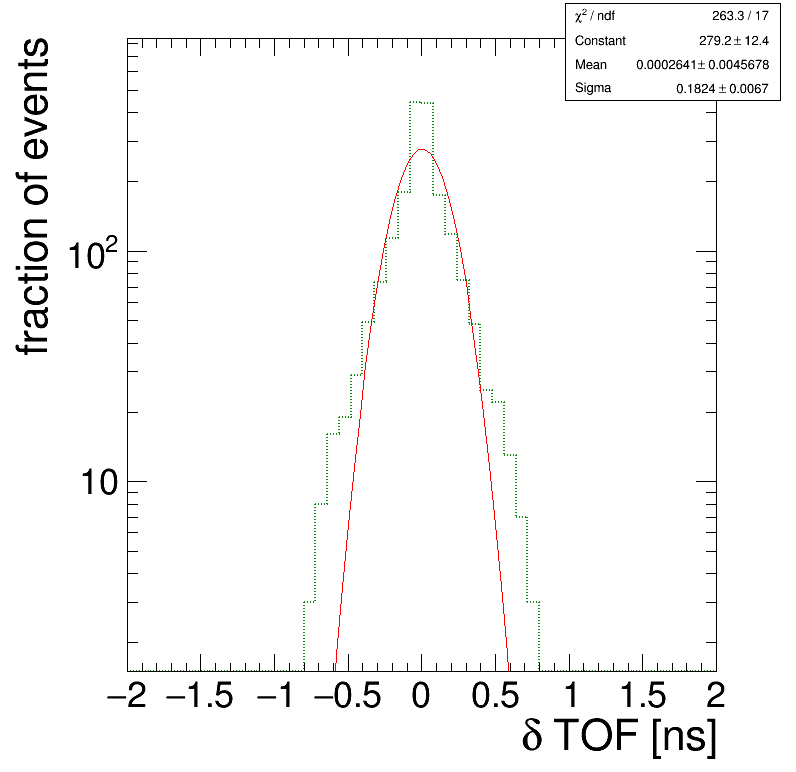

In [12]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    pho_dt_sm2 = v['g_dt_sm2_01'].array()
    pho_dt_sm5 = v['g_dt_sm5_01'].array()
    pho_dt_sm10 = v['g_dt_sm10_01'].array()
    pho_e_max = v['g_e_max_01'].array()
    pho_dt_max = v['g_dt_max_01'].array()
    pho_dt_min = v['g_dt_min_01'].array()
    pho_e_min = v['g_e_min_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>0, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>0, 1 )
    pho_time_not_equal_sm2_string = np.logical_and(cnt_sm2>0, 1 )
    pho_time_not_equal_sm5_string = np.logical_and(cnt_sm5>0, 1 )
    pho_time_not_equal_sm10_string = np.logical_and(cnt_sm10>0, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
   
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_e>10)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f4_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm2_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm5_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm10_string)
    pho_pair_f7_string = np.logical_and(pho_pair_f1_string, pho_e_max>5)
    pho_pair_f8_string = np.logical_and(pho_pair_f1_string, pho_e_min>5)
    
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt_sm2[pho_pair_f4_string]
    pho_dt5 = pho_dt_sm5[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm10[pho_pair_f6_string]
    pho_dt7 = pho_dt_max[pho_pair_f7_string]
    pho_dt8 = pho_dt_min[pho_pair_f8_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
    dt7 = pho_dt7.flatten()
    dt8 = pho_dt8.flatten()
 
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,1.])
#     ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
 

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht6.SetLineStyle(2)
    ht6.SetLineColor(209)
    
    ht7 = create_TH1D( dt7, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2.])
    ht7.SetLineStyle(3)
    ht7.SetLineColor(209)
    
    ht8 = create_TH1D( dt8, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[20,-1,1.])
#     ht8.GetYaxis().SetRangeUser(0, 1e+5)
    ht8.GetXaxis().SetLabelSize(0.02)
#     ht8.GetYaxis().SetMaximum(1e+5)
    ht8.SetLineStyle(2)
    ht8.SetLineColor(51)
    
 
 #     ht8.Draw('same')
#     ht7.Draw('same')
#     ht6.Draw('same')
#     ht5.Draw('same')
#     ht0.Draw('same')
        
 #     ht2.DrawNormalized('same')
#     ht8.DrawNormalized('same')
#     ht8.Fit('gaus')
#     ht8.Scale(100*ht8.GetMaximum())
    ht7.DrawNormalized('same')
    ht7.Fit('gaus')
#     ht7.Fit('gaus','','',-0.5,0.5)
#     ht7.Fit('gaus','','',-0.4,0.4)
#     ht6.DrawNormalized('same')
#     ht5.DrawNormalized('same')
#     ht4.DrawNormalized('same')
#     ht3.DrawNormalized('same')
#     ht2.DrawNormalized('same')
#     ht0.DrawNormalized('same')
 


 
 #     leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
#     leg.AddEntry(ht2, 'Overlap, E > 10 GeV')
#     leg.AddEntry(ht3, 'Overlap, E >  5GeV, E^{Pre-selection} > 1 GeV')
#     leg.AddEntry(ht4, 'Overlap, E >  5GeV, E^{Pre-selection} > 2 GeV')
#     leg.AddEntry(ht5, 'Overlap, E >  5GeV,  E^{Pre-selection} > 5 GeV')
#     leg.AddEntry(ht6, 'Overlap, E >  5GeV,  E^{Pre-selection} > 10 GeV')
    leg.SetHeader( 'Overlap, E >  5GeV')
    leg.AddEntry(ht7, 'E^{max} > 5 GeV')
#     leg.AddEntry(ht8, 'E^{min} > 5 GeV')
 
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_norm_max.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f5532b4b358>
 FCN=145.736 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.22419e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.45027e+02   7.87273e+00   2.73402e-02   1.30270e-05
   2  Mean        -5.65678e-04   6.97503e-03   4.09092e-05  -3.83307e-03
   3  Sigma        2.16647e-01   9.54429e-03   4.94575e-05   6.33195e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_dt_in_eb_e5_overlap_cone01_norm_min.png has been created


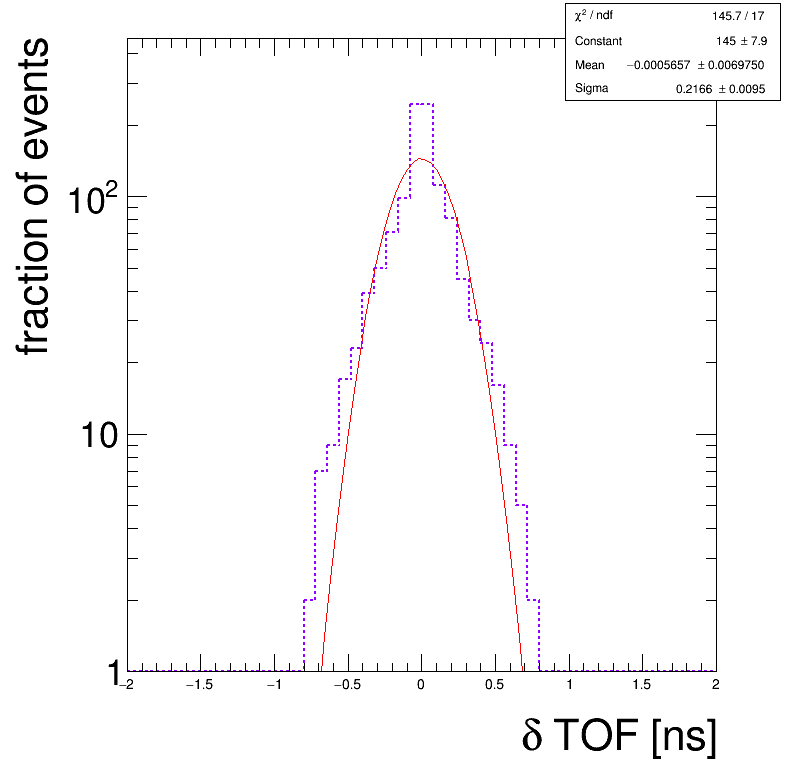

In [16]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
# leg = rt.TLegend(0.45,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    pho_dt_sm2 = v['g_dt_sm2_01'].array()
    pho_dt_sm5 = v['g_dt_sm5_01'].array()
    pho_dt_sm10 = v['g_dt_sm10_01'].array()
    pho_e_max = v['g_e_max_01'].array()
    pho_dt_max = v['g_dt_max_01'].array()
    pho_dt_min = v['g_dt_min_01'].array()
    pho_e_min = v['g_e_min_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>0, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>0, 1 )
    pho_time_not_equal_sm2_string = np.logical_and(cnt_sm2>0, 1 )
    pho_time_not_equal_sm5_string = np.logical_and(cnt_sm5>0, 1 )
    pho_time_not_equal_sm10_string = np.logical_and(cnt_sm10>0, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
   
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_e>10)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f4_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm2_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm5_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm10_string)
    pho_pair_f7_string = np.logical_and(pho_pair_f1_string, pho_e_max>5)
    pho_pair_f8_string = np.logical_and(pho_pair_f1_string, pho_e_min>5)
    
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt_sm2[pho_pair_f4_string]
    pho_dt5 = pho_dt_sm5[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm10[pho_pair_f6_string]
    pho_dt7 = pho_dt_max[pho_pair_f7_string]
    pho_dt8 = pho_dt_min[pho_pair_f8_string]
  
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
    dt7 = pho_dt7.flatten()
    dt8 = pho_dt8.flatten()
 
    
    ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht0.SetLineStyle(7)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.DrawNormalized('')
    
    ht2 = create_TH1D( dt2, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0,1.])
#     ht2.SetLineStyle(2)
    ht2.SetLineColor(std_color_list[i+2])
    ht2.SetMarkerColor(std_color_list[i+2])
    
    ht3 = create_TH1D( dt3, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht3.SetLineStyle(2)
    ht3.SetLineColor(std_color_list[i+3])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4 = create_TH1D( dt4, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht4.GetXaxis().SetLabelSize(0.02)
    ht4.SetLineStyle(3)
    ht4.SetLineColor(std_color_list[i+4])
    ht4.SetMarkerColor(std_color_list[i+4])
    
    ht5 = create_TH1D( dt5, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht5.SetLineStyle(2)
    ht5.SetLineColor(215)
 

    ht6 = create_TH1D( dt6, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[10,-0.,1.])
    ht6.SetLineStyle(2)
    ht6.SetLineColor(209)
    
    ht7 = create_TH1D( dt7, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[20,-1,1.])
    ht7.SetLineStyle(3)
    ht7.SetLineColor(209)
    
    ht8 = create_TH1D( dt8, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2.])
#     ht8.GetYaxis().SetRangeUser(0, 1e+5)
    ht8.GetXaxis().SetLabelSize(0.02)
#     ht8.GetYaxis().SetMaximum(1e+5)
    ht8.SetLineStyle(2)
    ht8.SetLineColor(51)
    
 
 #     ht8.Draw('same')
#     ht7.Draw('same')
#     ht6.Draw('same')
#     ht5.Draw('same')
#     ht0.Draw('same')
        
 #     ht2.DrawNormalized('same')
    ht8.DrawNormalized('same')
    ht8.Fit('gaus')
#     ht8.Scale(100*ht8.GetMaximum())
#     ht7.DrawNormalized('same')
#     ht7.Fit('gaus')
#     ht6.DrawNormalized('same')
#     ht5.DrawNormalized('same')
#     ht4.DrawNormalized('same')
#     ht3.DrawNormalized('same')
#     ht2.DrawNormalized('same')
#     ht0.DrawNormalized('same')
 


 
 #     leg.AddEntry(ht0, 'Overlap, E > 5 GeV')
#     leg.AddEntry(ht2, 'Overlap, E > 10 GeV')
#     leg.AddEntry(ht3, 'Overlap, E >  5GeV, E^{Pre-selection} > 1 GeV')
#     leg.AddEntry(ht4, 'Overlap, E >  5GeV, E^{Pre-selection} > 2 GeV')
#     leg.AddEntry(ht5, 'Overlap, E >  5GeV,  E^{Pre-selection} > 5 GeV')
#     leg.AddEntry(ht6, 'Overlap, E >  5GeV,  E^{Pre-selection} > 10 GeV')
    leg.SetHeader( 'Overlap, E >  5GeV')
#     leg.AddEntry(ht7, 'E^{max} > 5 GeV')
    leg.AddEntry(ht8, 'E^{min} > 5 GeV')
 
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_dt_in_eb_e5_overlap_cone01_norm_min.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-dt-fix-sm-e10.root <TTree b'ecalTPTree' at 0x7f87285f1240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-dt-fix-sm-e10.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e_tof_2d.png has been created


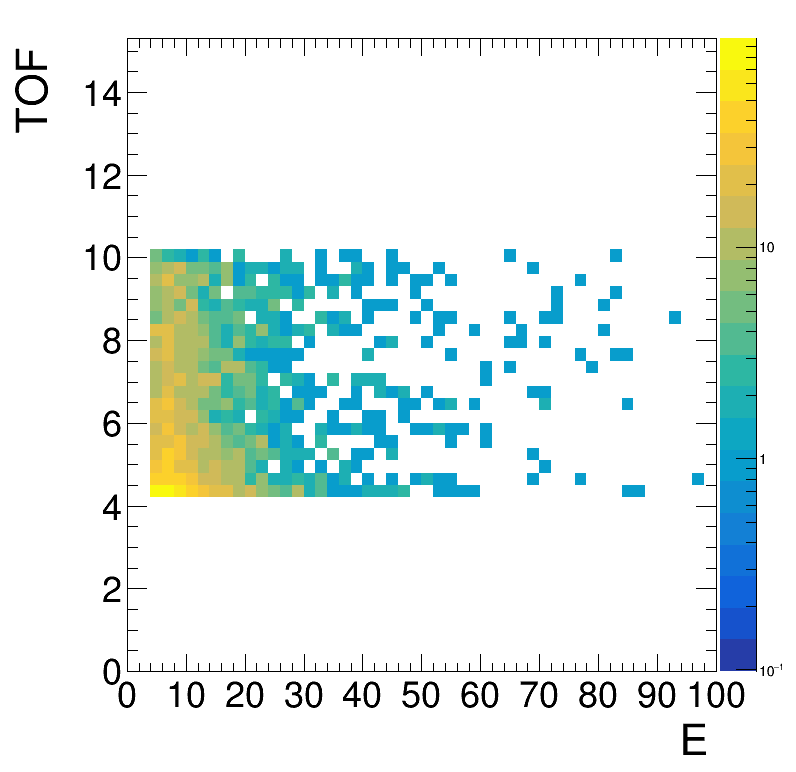

In [147]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
    pho_dt = v['g_dt_sc_01'].array()
    pho_dt_sm = v['g_dt_sm_01'].array()
    pho_dt_sm2 = v['g_dt_sm2_01'].array()
    pho_dt_sm5 = v['g_dt_sm5_01'].array()
    pho_dt_sm10 = v['g_dt_sm10_01'].array()
    pho_e_max = v['g_e_max_01'].array()
    pho_dt_max = v['g_dt_max_01'].array()
    pho_dt_min = v['g_dt_min_01'].array()
    pho_e_min = v['g_e_min_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    cnt_sm = v['g_cnt_sm_01'].array()
    cnt_sm2 = v['g_cnt_sm2_01'].array()
    cnt_sm5 = v['g_cnt_sm5_01'].array()
    cnt_sm10 = v['g_cnt_sm10_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_ema1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_mo_e = v['gParticleMotherE'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
#     pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
#     pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
#     pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>0, 1 )
    pho_time_not_equal_sm_string = np.logical_and(cnt_sm>0, 1 )
    pho_time_not_equal_sm2_string = np.logical_and(cnt_sm2>0, 1 )
    pho_time_not_equal_sm5_string = np.logical_and(cnt_sm5>0, 1 )
    pho_time_not_equal_sm10_string = np.logical_and(cnt_sm10>0, 1 )
    pho_e_sm_string = np.logical_and(pho_mo_e>5, 1 )
   
    pho_e2_sm_string = np.logical_and(pho_mo_e>15, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    pho_pair_f2_string = np.logical_and(pho_pair_f1_string, pho_e>10)
    pho_pair_f3_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm_string)
    pho_pair_f4_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm2_string)
    pho_pair_f5_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm5_string)
    pho_pair_f6_string = np.logical_and(pho_pair_f_string, pho_time_not_equal_sm10_string)
    pho_pair_f7_string = np.logical_and(pho_pair_f1_string, pho_e_max>5)
    pho_pair_f8_string = np.logical_and(pho_pair_f1_string, pho_e_min>5)
    
    
#     pho_pair_f_string = np.logical_and(pho_pair_f1_string, 1)
#     pho_pair_f2_string = np.logical_and(pho_pair_basic_string, 1)
    
   
    pho_tof1 = pho_tof[pho_pair_f_string]
    pho_e1 = pho_e[pho_pair_f_string]
    
    pho_dt1 = pho_dt[pho_pair_f_string]
    pho_dt2 = pho_dt[pho_pair_f2_string]
    pho_dt3 = pho_dt_sm[pho_pair_f3_string]
    pho_dt4 = pho_dt_sm2[pho_pair_f4_string]
    pho_dt5 = pho_dt_sm5[pho_pair_f5_string]
    pho_dt6 = pho_dt_sm10[pho_pair_f6_string]
    pho_dt7 = pho_dt_max[pho_pair_f7_string]
    pho_dt8 = pho_dt_min[pho_pair_f8_string]
  
    tof = pho_tof1.flatten()
    e = pho_e1.flatten()
    dt = pho_dt1.flatten()
    dt2 = pho_dt2.flatten()
    dt3 = pho_dt3.flatten()
    dt4 = pho_dt4.flatten()
    dt5 = pho_dt5.flatten()
    dt6 = pho_dt6.flatten()
    dt7 = pho_dt7.flatten()
    dt8 = pho_dt8.flatten()
 
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
   
    hz = rt.TH2D(k,k,50,0,100,50,-0,15)
    hz.GetZaxis().SetLabelOffset(0.001)
    hz.GetZaxis().SetLabelSize(0.02)
    hz.GetYaxis().SetTitle('TOF ')
    hz.GetXaxis().SetTitle('E ')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(e, tof)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetLogz()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_tof_2d.png')


# Energy spectrum

i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_e97.png has been created


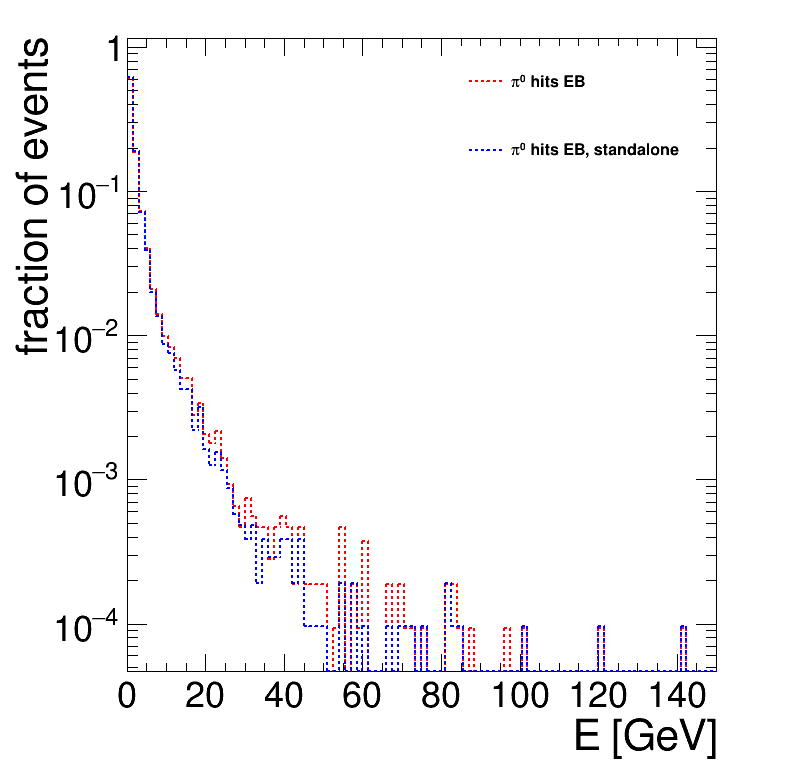

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.76,0.83,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_e = v['gParticleE'].array()
    pho_t = v['g_tof'].array()
    pho_tm = v['g_t_mindr'].array()
    pho_id = v['gParticleId'].array()
#     pho_mo_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.5)
    pho_mo1_string = np.logical_and(abs(pho_mo_id)>=1, abs(pho_mo_id)<=6)
    pho_mo2_string = np.logical_and(abs(pho_mo_id)==21, abs(pho_mo_id)>0)
    pho_mo_string = np.logical_or(pho_mo1_string, pho_mo2_string)
    pho_f_string = np.logical_and(pho_pair_basic_string, pho_mo_string)
    pho_alone_string = np.logical_and(pho_t>0,pho_tm==0)
    pho_f1_string = np.logical_and(pho_f_string, pho_alone_string)
    
    pho_e1 = pho_e[pho_f_string]
    pho_e2 = pho_e[pho_f1_string]
    
#     eta = pho_eta[:,0]
    e1 = pho_e1.flatten()
    e2 = pho_e2.flatten()
    
    ht0 = create_TH1D( e1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[100,-0,150])
    ht0.SetLineStyle(2)
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht1 = create_TH1D( e2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[100,-0,150])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
#     ht0.Draw('same')
#     ht1.Draw('same')
    ht0.DrawNormalized('same')
    ht1.DrawNormalized('same')

    leg.AddEntry(ht0, '#pi^{0} hits EB ')
    leg.AddEntry(ht1, '#pi^{0} hits EB, standalone ')
 
    i += 1

leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e97.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [0.06859589 0.06784201 0.04676533]
 FCN=103.429 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.81431e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.70009e+02   1.07096e+01   4.60280e-02  -3.71355e-06
   2  Mean        -1.67135e-02   3.51796e-03   1.75554e-05   2.59539e-02
   3  Sigma        2.14397e-01   2.10361e-03   1.38879e-05  -9.21836e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_1.png has been created


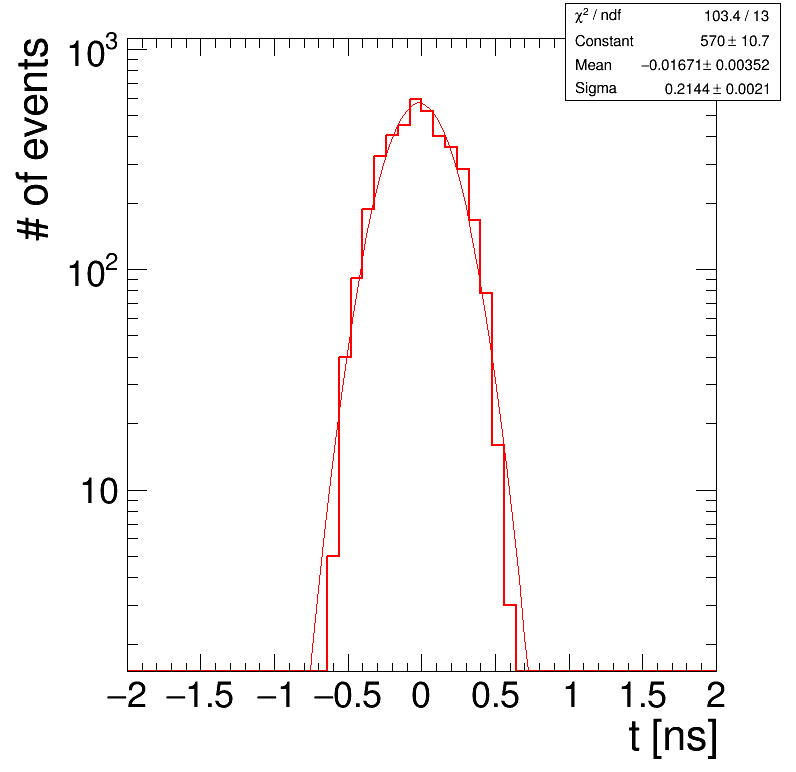

In [12]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_1.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [-0.0602113  -0.0602113  -0.10007519]
 FCN=229.172 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=9.04769e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.82388e+02   5.90131e+00   3.44244e-02  -2.61548e-07
   2  Mean        -8.79653e-02   6.91515e-02   5.12182e-04  -6.21518e-06
   3  Sigma        4.17772e+00   5.44121e-02   2.47302e-05  -1.35327e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_prod_vz.png has been created


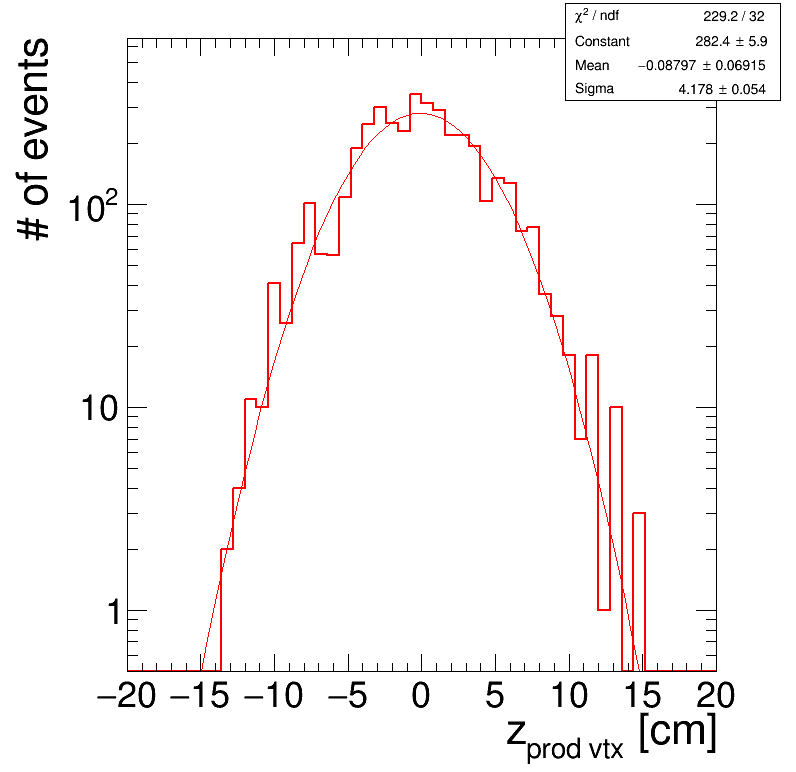

In [22]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gParticle_prod_vtx_z'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['z_{prod vtx} [cm]', '# of events'], name="", binning=[50,-20,20])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_prod_vz.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [0. 0. 0.]
 FCN=1.82858e-09 FROM HESSE     STATUS=NOT POSDEF     16 CALLS         116 TOTAL
                     EDM=3.65351e-09    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.09292e+03   1.21249e+03   7.93532e-03  -1.05166e-06
   2  Mean         1.51583e-01   6.88841e-02   4.52197e-07   1.85108e-02
   3  Sigma        2.09151e-01   9.49697e-02   9.05276e-07  -9.26185e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


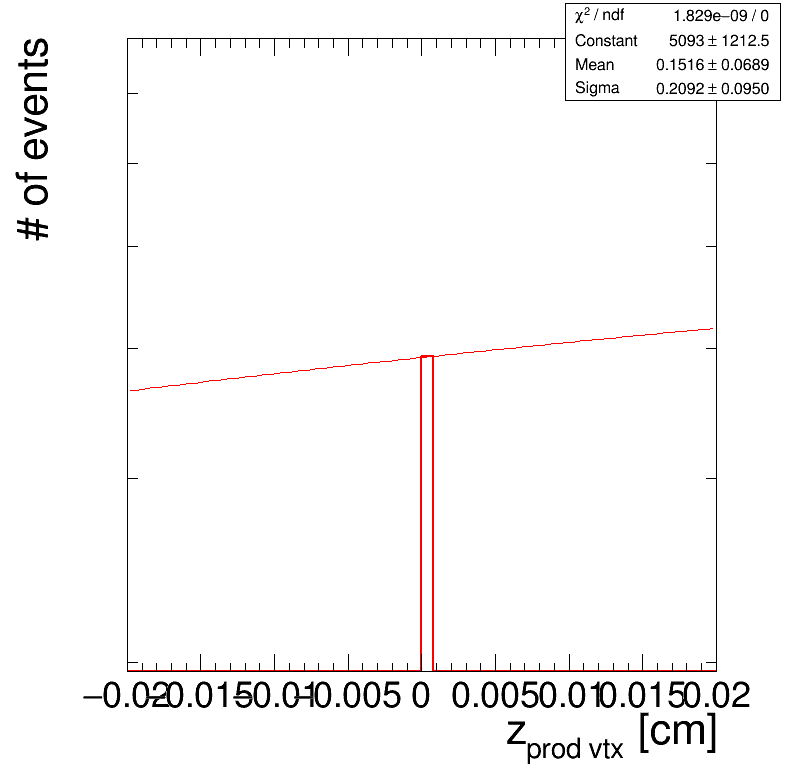

In [23]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['g_eb_time_Emax_01'].array()
#     pho_dt = v['g_eb_time'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['eb time [ns]', '# of events'], name="", binning=[50,-0.02,0.02])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
#     ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'pi0_prod_vz.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time 1.8479065554556882 0.39757760958262006 0.743113721838827
new time 1.7666363375601803 0.1840346713501982 0.6640288486393641
 FCN=63.3731 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.47375e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.25717e+02   2.73247e+00   8.13118e-03  -2.55288e-04
   2  Mean        -9.73227e-03   1.79563e-02   7.02672e-05  -4.77595e-03
   3  Sigma        9.69471e-01   1.72179e-02   1.86590e-05  -5.96713e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_2.png has been created


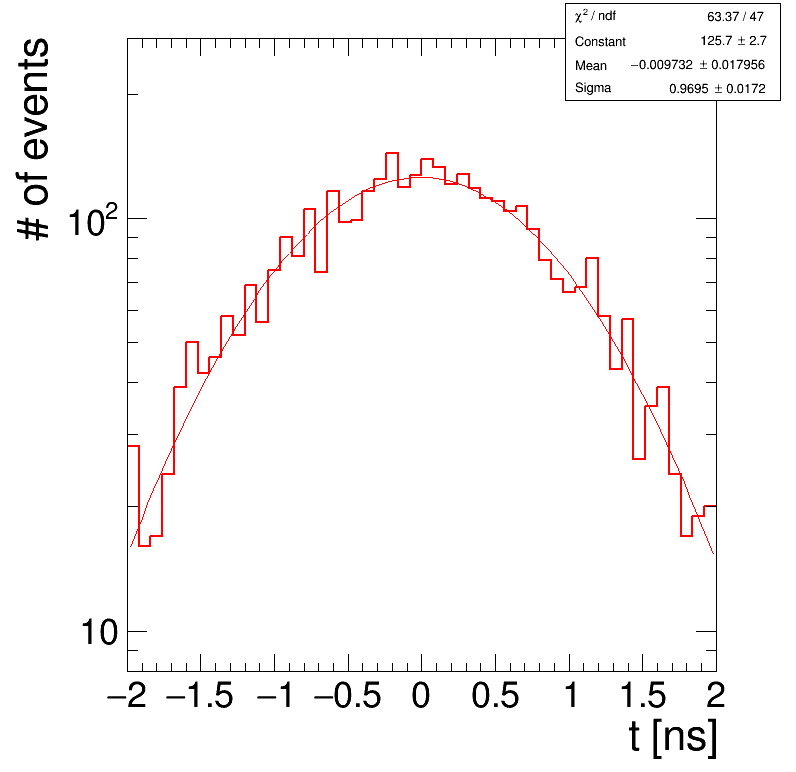

In [29]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,1.0,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_2.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time -1.746677671059493 -0.5277796604682634 -0.5284861739564491
new time -1.8279478889550007 -0.7413225987006853 -0.607571047155912
 FCN=21.8883 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=4.49571e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.02249e+02   5.98485e+00   1.13059e-02  -5.87745e-06
   2  Mean        -4.65378e-03   1.65701e-02   3.87087e-05  -1.70831e-04
   3  Sigma        1.03030e+00   1.21053e-02   7.38385e-06  -7.61174e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_1ns.png has been created


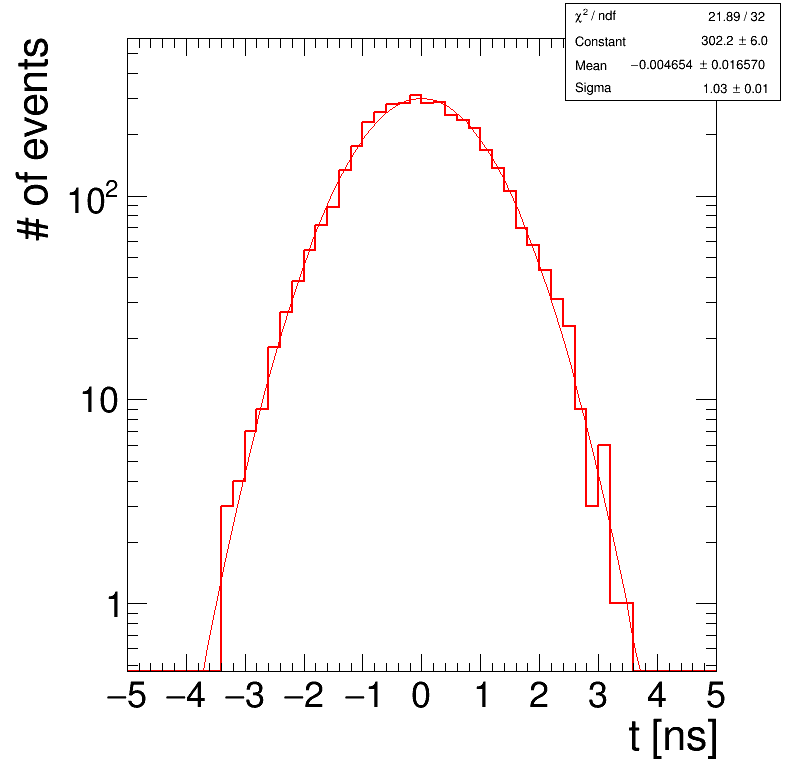

In [30]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,1.0,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_1ns.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time 0.2657958443419231 -0.9534001047577382 0.19206322732561074
new time 0.1845256264464153 -1.1669430429901602 0.11297835412614785
 FCN=13.6847 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=3.62198e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.59355e+02   1.10899e+01   1.67451e-02  -7.08000e-06
   2  Mean        -2.61419e-02   8.94056e-03   1.67110e-05   2.41065e-03
   3  Sigma        5.57593e-01   6.54804e-03   5.89933e-06  -2.55830e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_500ps.png has been created


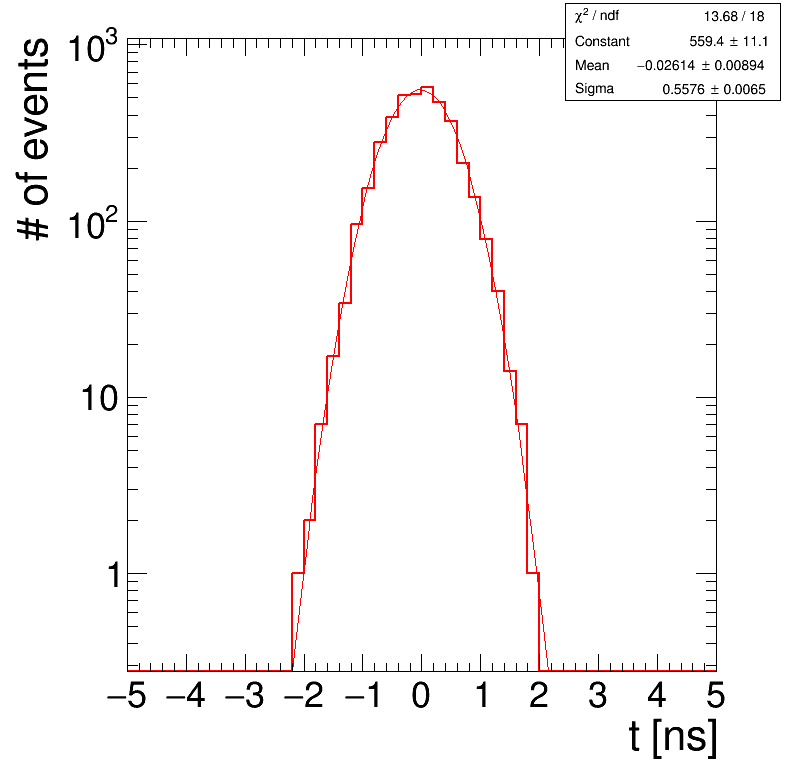

In [43]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.5,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_500ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time -0.08062415632616941 0.16495270586800148 -0.12580004342786913
new time -0.16189437422167724 -0.048590232364420394 -0.20488491662733202
 FCN=33.4289 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=3.49756e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.28316e+02   8.24154e+00   1.96794e-02  -1.69309e-06
   2  Mean        -9.31826e-03   4.69123e-03   1.33459e-05  -1.43160e-02
   3  Sigma        2.89840e-01   3.09455e-03   8.37014e-06  -1.38622e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_200ps.png has been created


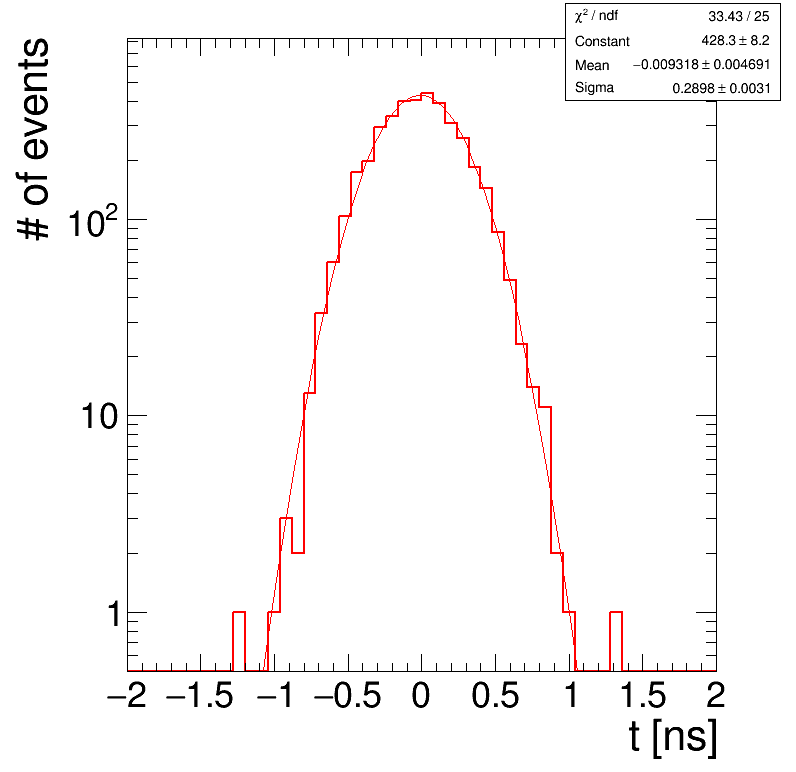

In [41]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.2,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_200ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time -0.050311413240519236 -0.10767026378387762 -0.27742451477426633
new time -0.13158163113602706 -0.3212132020162995 -0.3565093879737292
 FCN=47.4743 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=4.12175e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.19556e+02   9.76505e+00   2.83764e-02   3.50605e-06
   2  Mean        -1.96392e-02   3.84874e-03   1.30709e-05  -5.48303e-02
   3  Sigma        2.38189e-01   2.34534e-03   9.44949e-06  -5.67026e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_100ps.png has been created


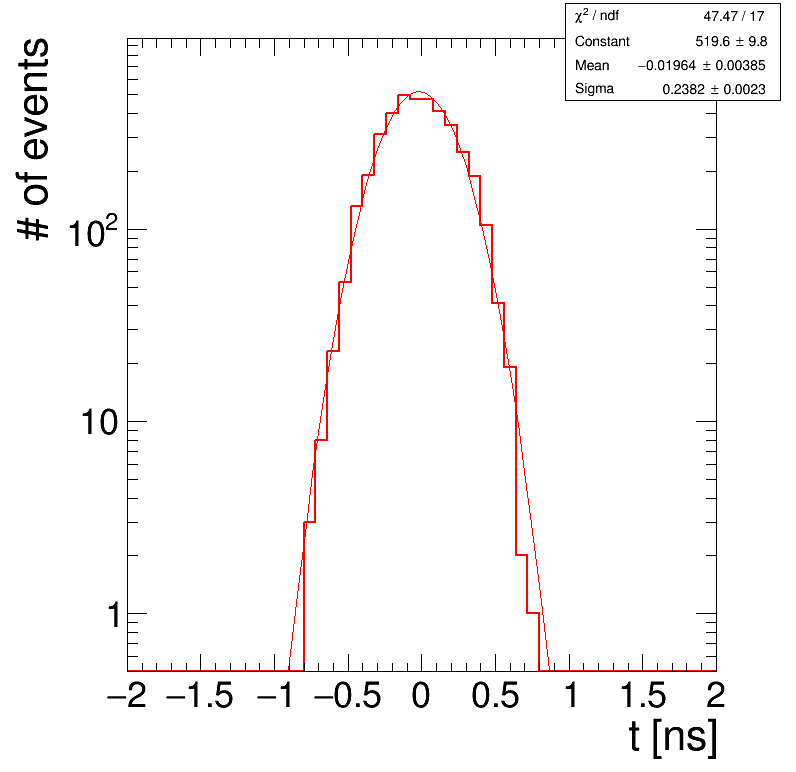

In [40]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.1,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time -0.08219520632956853 -0.0387104310448677 0.07743803177581393
new time -0.16346542422507634 -0.2522533692772896 -0.0016468414236489592
 FCN=72.9025 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.63735e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.54612e+02   1.04677e+01   3.75247e-02   2.63571e-06
   2  Mean        -1.85796e-02   3.62068e-03   1.51899e-05  -3.55646e-02
   3  Sigma        2.21980e-01   2.22888e-03   1.18956e-05  -3.46556e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_50ps.png has been created


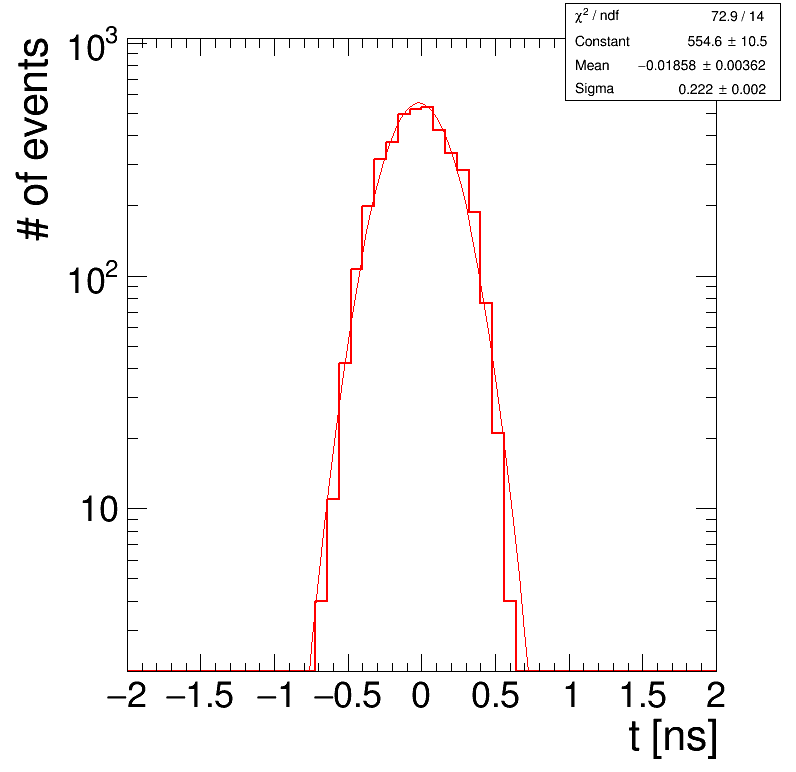

In [39]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.05,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_50ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time 0.018484687792237154 0.07411858454682019 0.0389008582323607
new time -0.06278553010327066 -0.1394243536856017 -0.040184014967102194
 FCN=73.3868 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.20045e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.55902e+02   1.03749e+01   3.77377e-02  -1.12470e-05
   2  Mean        -1.62412e-02   3.59250e-03   1.51138e-05   3.26198e-02
   3  Sigma        2.21199e-01   2.10723e-03   1.14002e-05  -1.34140e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_60ps.png has been created


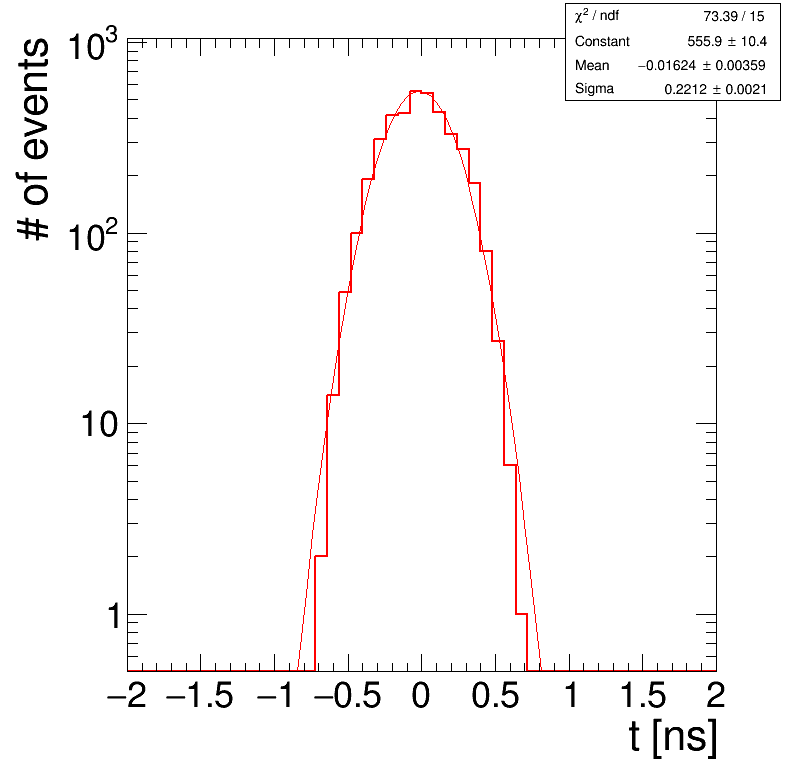

In [38]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.06,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-same-prod-vtx.root <TTree b'ecalTPTree' at 0x7f724af17b70>
dt [-0.08127022 -0.21354294 -0.07908487]
dt flat -0.08127022 -0.21354294 -0.07908487
dt flat 3922
smear time 0.012073027852538106 -0.0060787245514296335 -0.037418204412664406
new time -0.0691971900429697 -0.2196216627838515 -0.1165030776121273
 FCN=56.3505 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=2.12578e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.59114e+02   1.07226e+01   3.32532e-02  -3.58310e-06
   2  Mean        -1.85422e-02   3.63038e-03   1.34124e-05  -1.55963e-02
   3  Sigma        2.21499e-01   2.39815e-03   1.11933e-05  -5.09885e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_30ps.png has been created


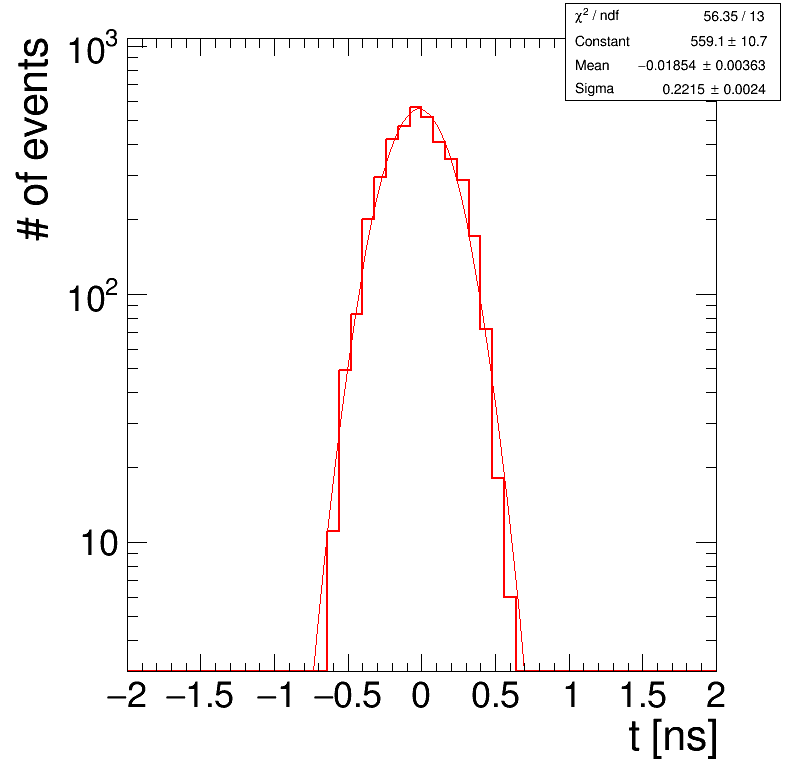

In [44]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_dt = v['gen_time'].array()
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()    

    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
 
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5) 
 
    pho_dt = pho_dt[pho_pair_f1_string]
  
    print('dt',pho_dt[0])
 
  
    dt = pho_dt.flatten()
    print('dt flat',dt[0],dt[1],dt[2])
    print('dt flat',len(dt))
    SmearTime = np.random.normal(0,0.03,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_30ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


tof [5.097539  4.9892826]
tmax [5.1207757 5.1207757]
tmin [4.9659467 4.9659467]
dt [0.06859589 0.06784201 0.04676533]
 FCN=103.429 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=4.81596e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.70009e+02   1.07096e+01   4.60280e-02  -3.71532e-06
   2  Mean        -1.67135e-02   3.51796e-03   1.75554e-05   2.59578e-02
   3  Sigma        2.14397e-01   2.10361e-03   1.38879e-05  -9.21633e-03


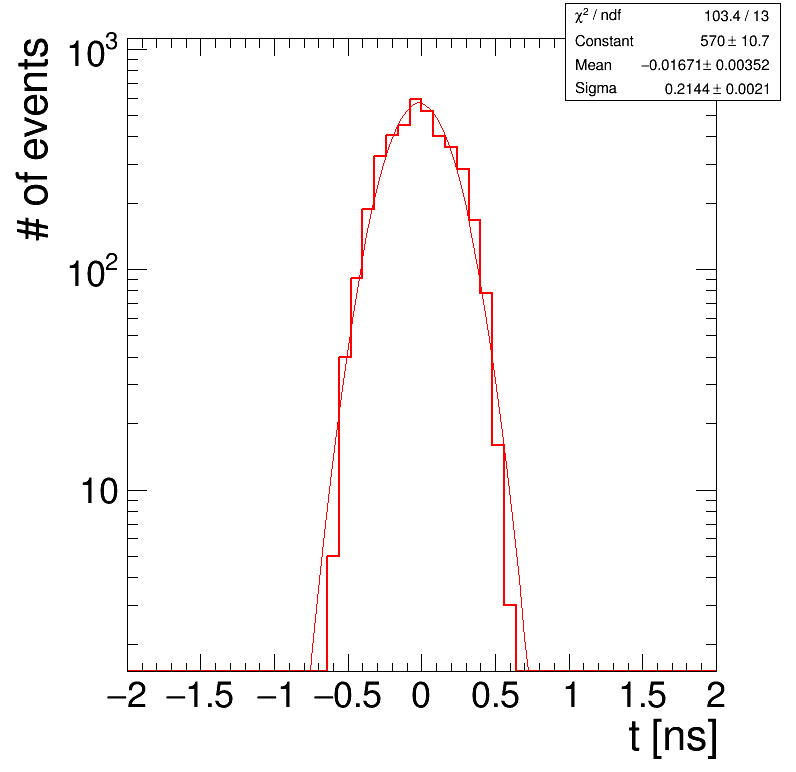

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    pho_pair_basic_string = np.logical_and(pho_id==111, abs(pho_eta)<1.4)
    pho_pair_basic_emax_string = np.logical_and(pho_pair_basic_string, pho_emax1>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_emax2>0)
#     pho_pair_f_string = np.logical_and(pho_pair_basic_emax_string, pho_e>5)
    pho_pair_f1_string = np.logical_and(pho_pair_basic_string, pho_e>5)
    pho_time_equal_string = np.logical_and(pho_tmax==pho_tmin, pho_tmin==pho_tof)
    pho_time_not_equal_string = np.logical_not(pho_time_equal_string )
    pho_time_not_equal_string = np.logical_and(cnt>1, 1 )
#     pho_pair_f_string = np.logical_and(pho_pair_basic_string, 1)
    pho_pair_f_string = np.logical_and(pho_pair_f1_string, pho_time_not_equal_string)
    
    pho_tof = pho_tof[pho_pair_f_string]
    pho_dt = pho_dt[pho_pair_f1_string]
    pho_tmax = pho_tmax[pho_pair_f_string]
    pho_tmin = pho_tmin[pho_pair_f_string]
    
    print('tof',pho_tof[1])
    print('tmax',pho_tmax[1])
    print('tmin',pho_tmin[1])
    print('dt',pho_dt[1])
#     eta = pho_eta[:,0]
    tof = pho_tof.flatten()
    tmax = pho_tmax.flatten()
    tmin = pho_tmin.flatten()
    dt = pho_dt.flatten()
#     dt = tmax-tmin
#     dt = tmax-tof
#     dt = tmin-tof
    
    ht0 = create_TH1D( dt, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'pi0_gen_time_1.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
 FCN=121.732 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.51588e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.18448e+03   1.48061e+01   6.93142e-02  -1.41165e-05
   2  Mean        -1.25353e-02   2.49357e-03   1.34896e-05   4.74069e-02
   3  Sigma        2.30278e-01   1.44491e-03   9.67222e-06  -2.14214e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp.png has been created


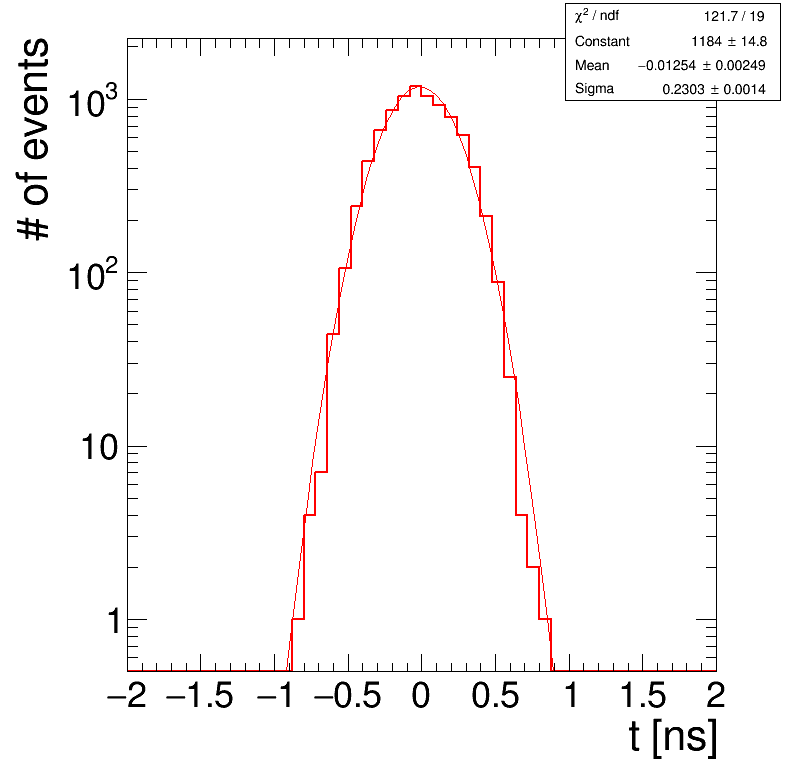

In [13]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()
 
    ht0 = create_TH1D( tp, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
smear time 0.005439889060846068 -0.010819726336210658 -0.051923632857174155
new time -0.07583032883466174 -0.22436266456863252 -0.13100850605663705
 FCN=66.7214 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=4.543e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.55929e+02   1.03935e+01   3.59785e-02  -1.18399e-05
   2  Mean        -1.77103e-02   3.59391e-03   1.44361e-05   7.22241e-02
   3  Sigma        2.21578e-01   2.13120e-03   1.09452e-05  -5.21245e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_60ps.png has been created


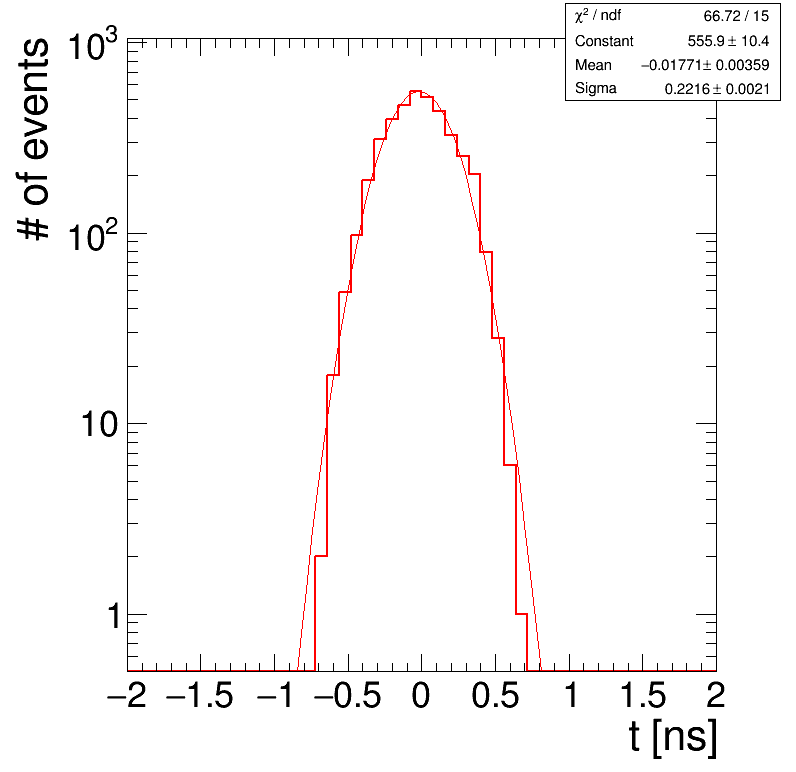

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.06,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
smear time 0.05029198406358511 0.042440881416930906 -0.04213274875224479
new time -0.030978233831922705 -0.17110205681549095 -0.12121762195170768
 FCN=34.4975 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=2.61245e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.28329e+02   9.94656e+00   2.46511e-02   5.77780e-06
   2  Mean        -1.50179e-02   3.79319e-03   1.10335e-05  -6.07079e-03
   3  Sigma        2.35085e-01   2.34495e-03   8.18783e-06   2.37292e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_100ps.png has been created


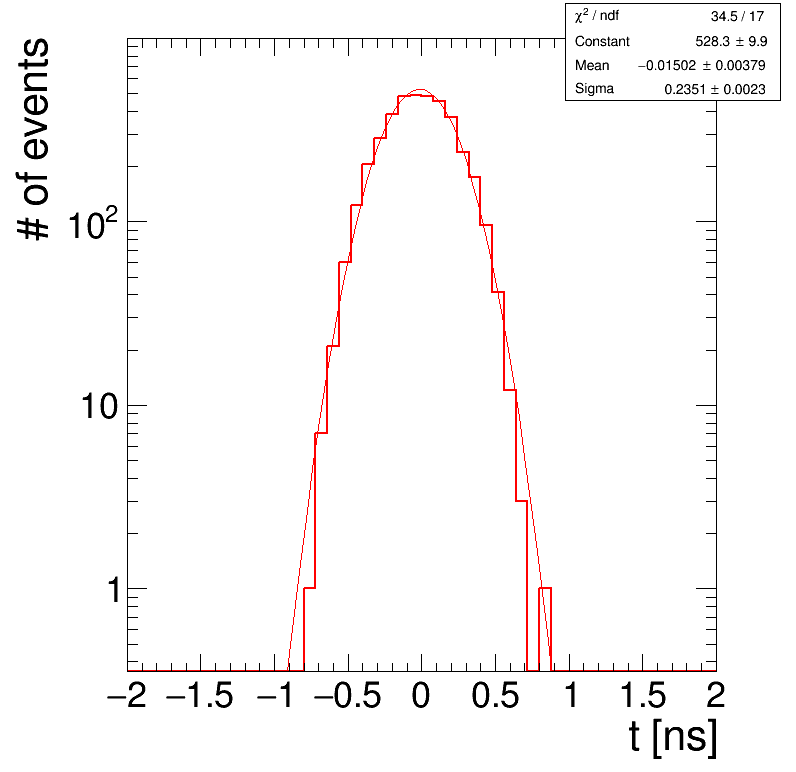

In [16]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.1,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
smear time -0.07193371624135483 0.07611249597761388 -0.06204665212045893
new time -0.15320393413686265 -0.137430442254808 -0.14113152531992182
 FCN=20.1034 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.77224e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.19746e+02   8.20833e+00   1.50729e-02  -2.70538e-06
   2  Mean        -1.01215e-02   4.79108e-03   1.07361e-05  -8.61921e-04
   3  Sigma        2.97022e-01   3.37921e-03   6.95398e-06  -4.01688e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_200ps.png has been created


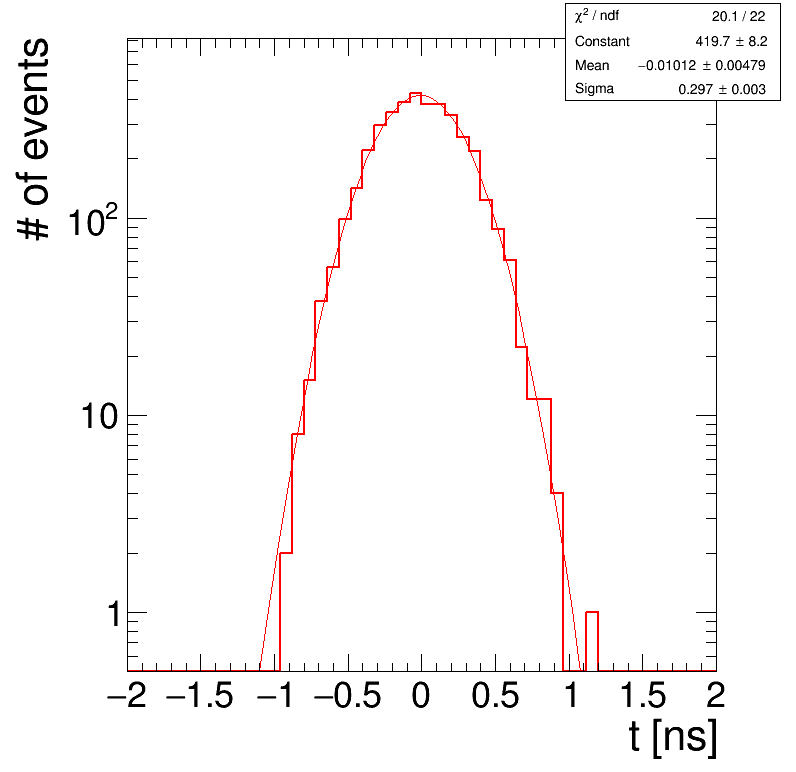

In [17]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.2,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-2,2])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_200ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-eb-tp.root <TTree b'ecalTPTree' at 0x7fc8f76cfa90>
smear time -0.039349657959202984 0.35605832526633246 -0.11627192199894251
new time -0.12061987585471079 0.1425153870339106 -0.1953567951984054
 FCN=22.447 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=9.18647e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.66197e+02   1.11919e+01   2.14369e-02   4.19250e-06
   2  Mean        -1.25566e-02   8.85700e-03   2.09038e-05  -8.49471e-05
   3  Sigma        5.49886e-01   6.42375e-03   7.42709e-06   1.21714e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_500ps.png has been created


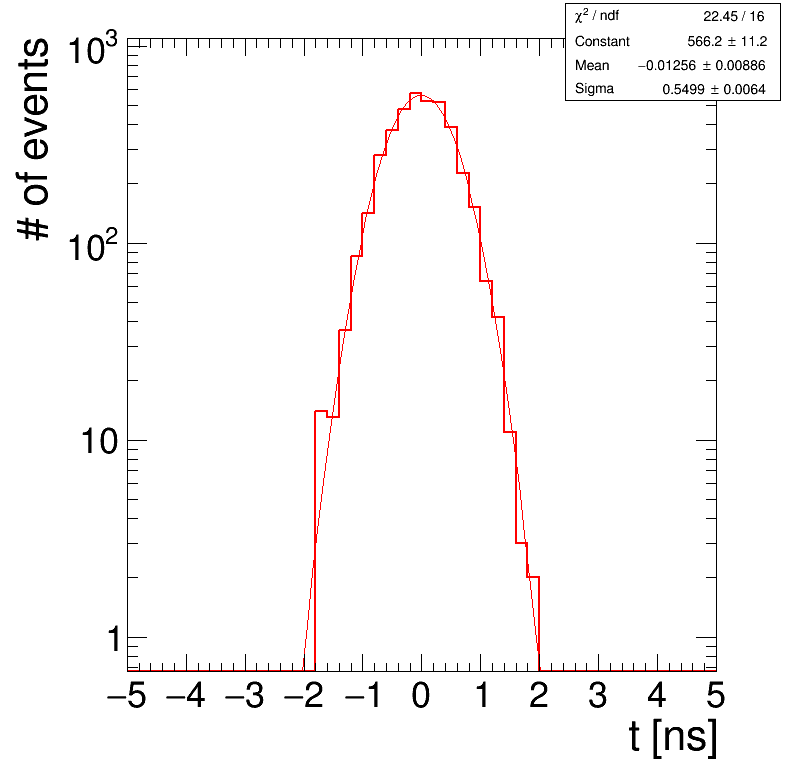

In [18]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,0.5,len(dt))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(dt, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_500ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time.root <TTree b'ecalTPTree' at 0x7f2dbf538b70>
smear time -1.0364768030299074 1.466460180813979 -0.5366482342513138
new time -1.0275380136622316 1.340561342770766 -0.5950541104109818
 FCN=29.5451 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=4.4367e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.75942e+02   8.98636e+00   1.96227e-02  -4.04192e-05
   2  Mean        -2.66643e-02   1.09990e-02   2.96637e-05  -1.47952e-04
   3  Sigma        1.01984e+00   7.99179e-03   5.68043e-06  -1.00415e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/pi0_gen_time_tp_1ns.png has been created


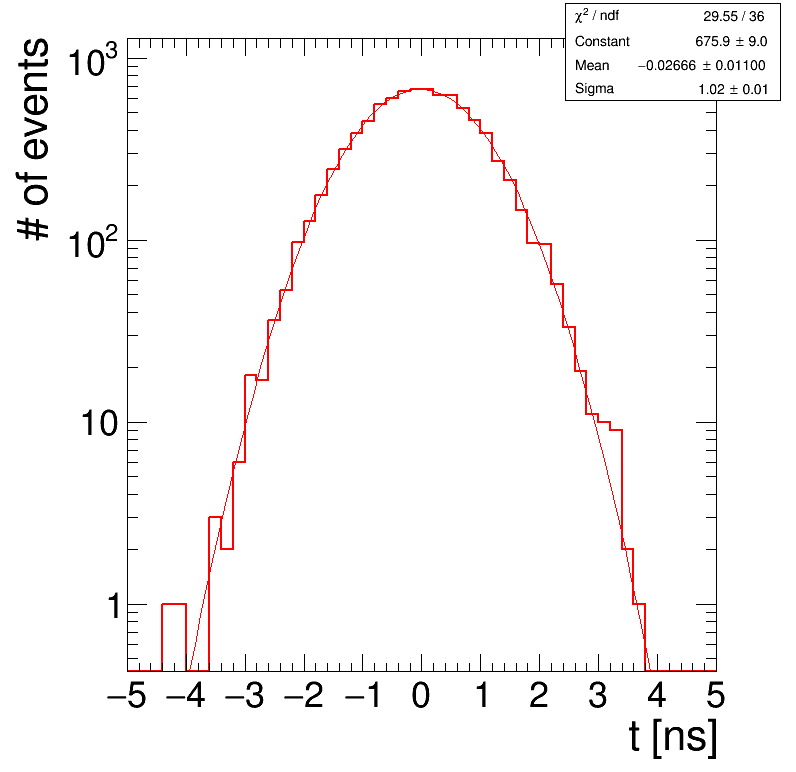

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_tof = v['g_tof'].array()
#     pho_dt = v['g_dt_sc_01'].array()
    pho_dt = v['gen_time'].array()
    eb_et = v['eb_Et'].array()
    eb_edep = v['eb_Edep'].array()
    eb_eta = v['eb_cell_Eta'].array()
    pho_tp = v['gen_time_tp'].array()
    pho_tp_e = v['gen_time_e'].array()
#     pho_dt = v['gen_time_max_01'].array()
    cnt = v['g_cnt_sc_01'].array()
    pho_tmax = v['g_tmax_sc_01'].array()
    pho_tmin = v['g_tmin_sc_01'].array()
    pho_e = v['gParticleE'].array()
    pho_emax1 = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
#     for ii,x in enumerate(pho_tmax):
#         for j,y in enumerate(x):
#             if(y==1000):
#                 pho_tma[ii][j] = 0.
    
    basic_string = np.logical_and(pho_tp>-666, pho_tp_e>5)
    basic1_string = np.logical_and(abs(eb_eta)<1.4,eb_edep>1)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = pho_tp[basic2_string]
  
    tp = tp1.flatten()

    SmearTime = np.random.normal(0,1.,len(tp))
    print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
    NewTime = [x+y for x,y in zip(tp, SmearTime)]
    print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
    ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
#     ht0 = create_TH1D( dt, axis_title=['#delta TOF [ns]', 'fraction of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_gen_time_tp_1ns.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


# jet time

i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time.root <TTree b'ecalTPTree' at 0x7f2dbf538b70>
 FCN=37.5973 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.36095e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.67975e+02   5.89133e+00   1.50431e-02  -7.79490e-06
   2  Mean        -1.19573e-02   6.91751e-03   2.01459e-05  -4.91087e-03
   3  Sigma        2.19337e-01   4.37833e-03   1.60847e-05  -4.24193e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time.png has been created


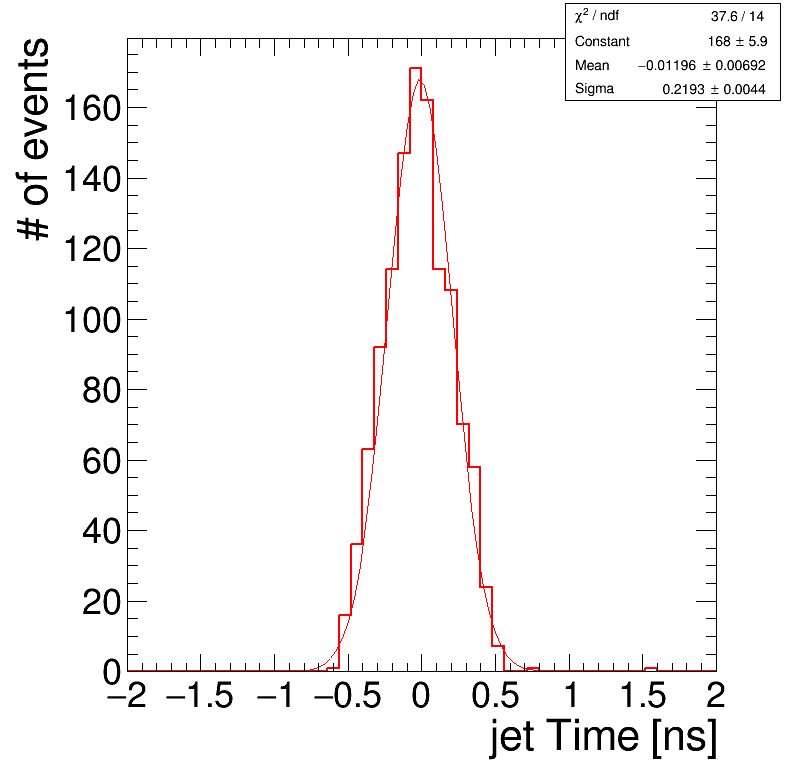

In [10]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t5'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuE'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>30)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time-rescale.root <TTree b'ecalTPTree' at 0x7f7c297edac8>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


 FCN=69.3956 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=5.05601e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.90366e+02   7.67102e+00   2.70174e-02  -4.13466e-05
   2  Mean         1.21854e-03   4.97700e-03   1.98789e-05  -3.34816e-02
   3  Sigma        2.13154e-01   2.88713e-03   1.50801e-05  -2.35676e-02


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time_pt20.png has been created


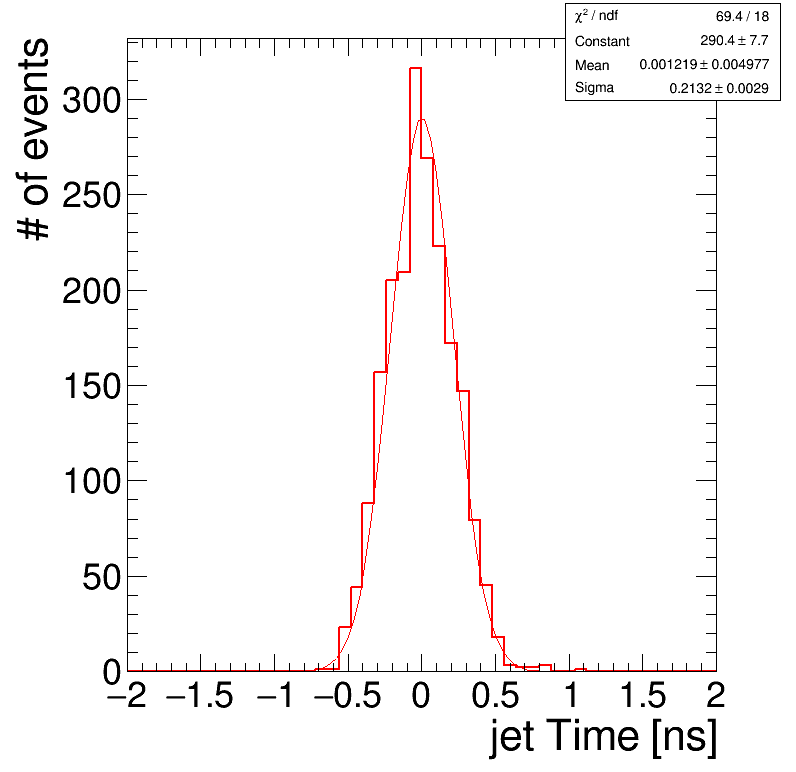

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time-rescale.root <TTree b'ecalTPTree' at 0x7f7c297edac8>
 FCN=30.6967 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=1.95236e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.86292e+02   7.65001e+00   1.76992e-02   1.50864e-06
   2  Mean        -6.91947e-03   5.01422e-03   1.37850e-05  -1.21826e-02
   3  Sigma        2.20868e-01   3.24754e-03   1.12373e-05  -5.03363e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time_pt20_60ps.png has been created


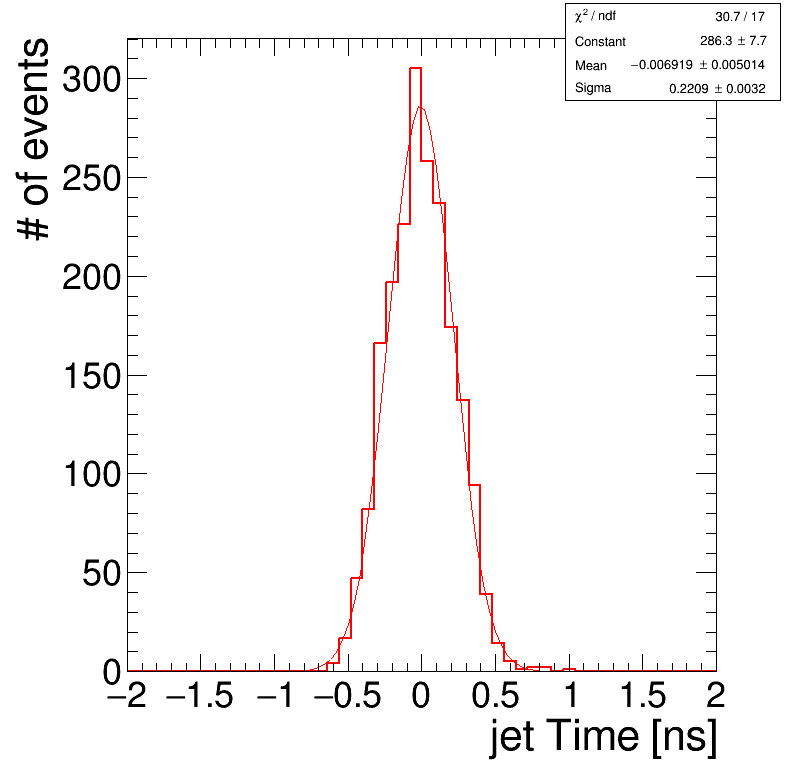

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_60ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time-rescale.root <TTree b'ecalTPTree' at 0x7f7c297edac8>
 FCN=33.8613 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.29368e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.83455e+02   7.49350e+00   1.83928e-02  -1.70898e-05
   2  Mean        -5.97528e-03   5.03038e-03   1.44888e-05   1.97479e-02
   3  Sigma        2.22422e-01   3.10718e-03   1.12326e-05  -1.68510e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time_pt20_100ps.png has been created


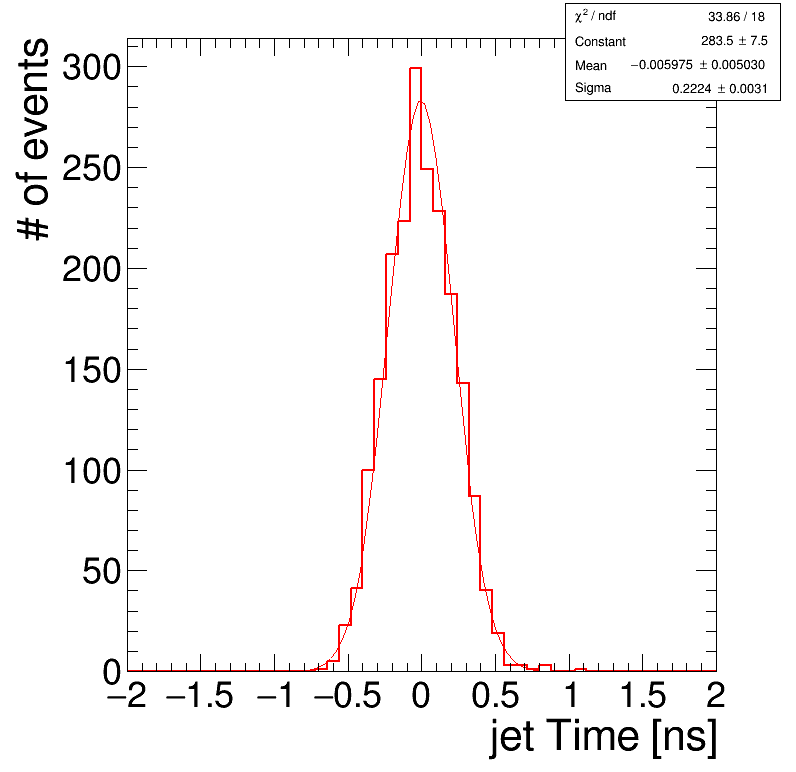

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_100ps.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time-rescale.root <TTree b'ecalTPTree' at 0x7f7c297edac8>
 FCN=27.0869 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.51923e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.87214e+02   7.66315e+00   1.67003e-02   2.70032e-05
   2  Mean        -1.42990e-02   5.00887e-03   1.29590e-05   2.75966e-02
   3  Sigma        2.20600e-01   3.23890e-03   1.04959e-05  -8.07358e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time_pt20_60ps_func.png has been created


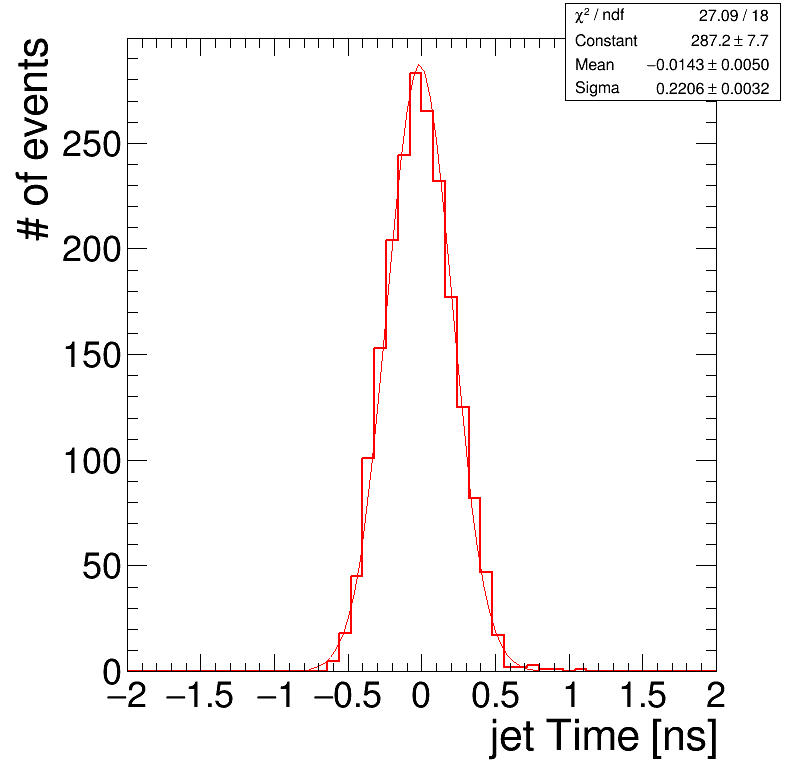

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_60ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_60ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-jet-time-rescale.root <TTree b'ecalTPTree' at 0x7f7c297edac8>
 FCN=31.0506 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.82328e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.70796e+02   7.25814e+00   1.68359e-02  -1.00298e-06
   2  Mean         2.36737e-03   5.36655e-03   1.45748e-05  -1.28197e-03
   3  Sigma        2.33219e-01   3.43154e-03   1.11133e-05   2.12212e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190814/jet_time_pt20_100ps_func.png has been created


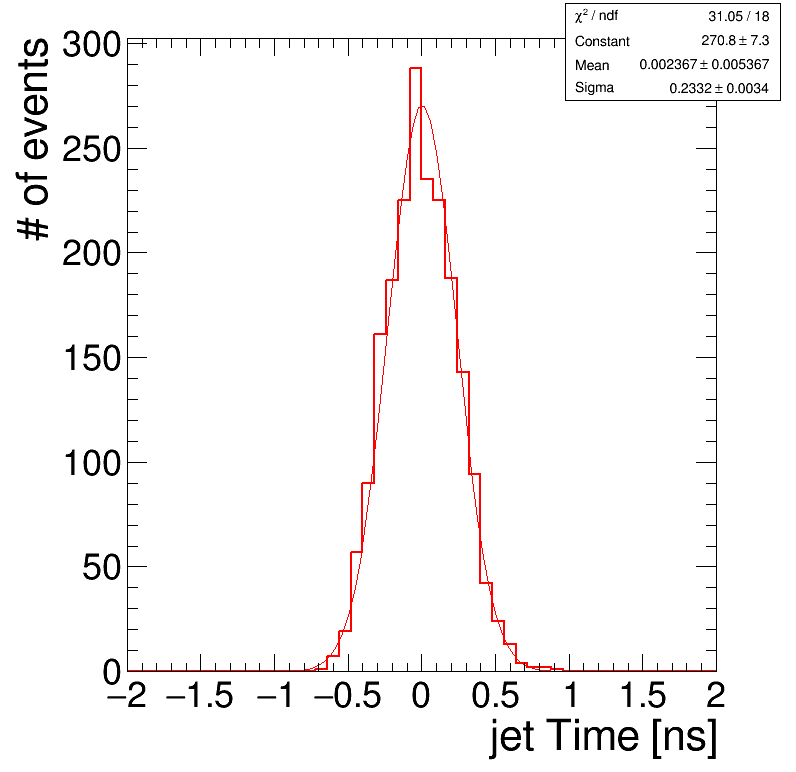

In [7]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
 
    jet_t5 = v['gak4JetNoNuTime_t_100ps_func'].array()
    jet_eta = v['gak4JetNoNuEta'].array()
    jet_e = v['gak4JetNoNuPt'].array()
    jet_t = v['gak4JetNoNuTime'].array()
    jet_Esum_t = v['gak4JetNoNuEsum_t'].array()
  
    
    basic_string = np.logical_and(jet_t>-666, jet_e>20)
    basic1_string = np.logical_and(abs(jet_eta)<1.4,jet_Esum_t>5)
    basic2_string = np.logical_and(basic_string,basic1_string)
 
    tp1 = jet_t5[basic2_string]
  
    tp = tp1.flatten()

#     SmearTime = np.random.normal(0,1.,len(tp))
#     print('smear time',SmearTime[0],SmearTime[1],SmearTime[2])
#     NewTime = [x+y for x,y in zip(tp, SmearTime)]
#     print('new time',NewTime[0],NewTime[1],NewTime[2])
 
    
#     ht0 = create_TH1D( NewTime, axis_title=['t [ns]', '# of events'], name="", binning=[50,-5,5])
    ht0 = create_TH1D( tp, axis_title=['jet Time [ns]', '# of events'], name="", binning=[50,-2,2])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    ht0.Fit('gaus')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'jet_time_pt20_100ps_func.png')
# c.SaveAs(out_dir+'pi0_tof_same_direction.png')
